In [26]:
# 사용하려는 라이브러리 호출 및 저장
import bok_python as bp
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 구성함수 (상위함수와 사용되는 하위함수)
- `order_VAR`: AR(p) 또는 VAR(p) 모형에 대한 최적 차수 추정

- `VAR_IRF_Boot`: VAR 모형에 대한 충격반응함수 및 부트스트래핑 (Bootstrapping)을 사용한 신뢰구간 추정

    - `OLS_VAR`: 다변량 VAR(p) 모형에 대한 OLS 추정

    - `B0invSolve`: 구조 VAR 식별 (단기 또는 장기 제약)

    - `irf_estimate`: 충격반응함수 추정

    - `randper`: 무작위 변수 순서 변경
    
- `VAR_GenIRF_Boot`: VAR 모형에 대한 일반화된 충격반응함수 (generalized IRF) 도출 및 부트스트래핑을 사용한 신뢰구간 추정

    - `OLS_VAR`: VAR(p) 모형에 대한 OLS 추정

    - `irf_estimate`: 충격반응함수 추정

    - `randper`: 무작위 변수 순서 변경

- `VarDecomp`: 예측오차 분산 분해 (Forecast error variance decomposition)

- `HistDecomp`: 역사적 분해 추정

- `GCtest`: 그레인져 인과관계 검정 (Granger Causality Test)

- `VAR_block_IRF_Boot`: Block Exogeneity 제약 하 VAR(p) 모형에 대한 충격반응함수 및 부트스트래핑을 사용한 신뢰구간 추정

    - `OLS_VAR_block`: Block exogeneity 제약 하 VAR(p) 모형에 대한 OLS 추정

    - `B0invSolve_block`: Block exogeneity 제약 하 구조 VAR 식별 (단기 또는 장기 제약)

    - `irf_estimate`: 충격반응함수 추정
    
    - `randper`: 무작위 변수 순서 변경

## 2. 데이터 불러오기
- 패키지를 적용하기 위해 데이터를 불러오자.

데이터는 한국의 전기대비 실질 GDP 성장률, CD91일 금리, 인플레이션율 소비자 가격 지수 (Consumer Price Index, CPI), CD91일 금리로 1999년 4분기부터 2023년 4분끼지의 분기별 자료이다. 해당 데이터는 ECOS (https://ecos.bok.or.kr/#/)에서 다운로드 받았으며 컴퓨터에 "python_data.xlsx"라는 이름의 엑셀파일의 "KORmacro"라는 시트에 저장되어 있다. 이때, 인플레이션율의 경우 소비자 가격 지수 (Consumer Price Index, CPI)의 전년동기대비 치분 (YoY)을 통해 미리 변환한 것이다.

In [27]:
dataset = pd.read_excel('./test_data/python_data.xlsx', sheet_name='KORmacro')
data = pd.DataFrame(dataset)
sample = data.copy() # 2000 Q4 ~ 2023 Q4
sample.columns = ['Date', 'rGDP', 'cd91', 'cpi']
sample = sample.drop(columns='Date')
Y = bp.matrix(sample)
y = np.hstack((Y[:,2], Y[:,0], Y[:,1])) # inf, rgdp, cd91
print(y)

[[ 2.50825674 -0.3         6.97      ]
 [ 3.62787647  1.2         5.95      ]
 [ 4.91977836  1.3         5.78      ]
 [ 4.15845571  1.4         4.97      ]
 [ 3.24432712  1.8         4.58      ]
 [ 2.49312186  2.5         4.66      ]
 [ 2.65301778  1.8         4.82      ]
 [ 2.48327342  2.          4.84      ]
 [ 3.26274729  1.1         4.91      ]
 [ 3.99447248 -0.7         4.67      ]
 [ 3.25179791 -0.2         4.43      ]
 [ 3.11885552  1.9         3.96      ]
 [ 3.46197014  2.6         4.17      ]
 [ 3.19518718  1.3         4.09      ]
 [ 3.35335611  0.8         3.91      ]
 [ 4.24041364  0.4         3.71      ]
 [ 3.31458915  0.8         3.44      ]
 [ 3.19908562  0.9         3.54      ]
 [ 2.93407558  1.9         3.51      ]
 [ 2.30935249  1.5         3.57      ]
 [ 2.43250478  1.          3.98      ]
 [ 2.06002426  1.6         4.22      ]
 [ 2.21389642  0.7         4.39      ]
 [ 2.49257567  1.6         4.65      ]
 [ 2.10258113  0.8         4.64      ]
 [ 1.98337999  1.7       

## 3. VAR 모형의 최적 시차 결정

#### 구문
`bp` 패키지 속의 `order_VAR`라는 함수를 사용하면 VAR 모형의 최적 시차를 추정 할 수 있다. 이때, `order_VAR`라는 함수는 다음과 구성되어 있다.

> *<p style="font-size:20px">`p_seq, p_aic, p_bic, p_hq = bp.order_VAR(y,pmax=None)`</p>*
> *<p style="font-size:15px">VAR(p) 모형의 최적 시차 p 추정</p>*
> - **입력**:
</br></br>
    `y`: 사용하는 VAR(p) 모형의 반응변수 벡터
    </br></br>
    `pmax`: 예상하는 VAR(p) 모형의 최대 시차
    </br></br>
> - **출력**:
</br></br>
    `p_seq`: 순차적 검정으로 추정된 VAR(p) 모형의 최적 시차
    </br></br>
    `p_aic`: Akaike 정보기준 (AIC)로 추정된 VAR(p) 모형의 최적 시차
    </br></br>
    `p_bic`: Bayesian 정보기준 (BIC)로 추정된 VAR(p) 모형의 최적 시차
    </br></br>
    `p_hq`: Hannan-Quinn 정보기준 (HQIC)로 추정된 VAR(p) 모형의 최적 시차
    </br></br>

#### 이론
VAR 모형은 여러 개의 변수로 구성된 반응변수 벡터 $y$의 시차항들이 설명변수로 사용되기 때문에 최적 시차를 결정하는 과정이 필요하다. VAR 모형의 최적 시차는 아래와 같이 연구자가 예상하는 최대 시차인 $pmax$를 사용하는 VAR(pmax)모형
$\begin{equation}
y_{t} = A_{1}y_{t-1} + \cdots + A_{pmax}y_{t-pmax} + u_{t} \notag
\end{equation}$
을 사용하여 (1) 순차적 검정 (sequential testing)과 (2) 정보 기준 (information criteria) 검정을 통해 추정할 수 있다.
##### 3.1. 순차적 검정
순차적 검정은 최대 예상시차인 $pmax$부터 순차적으로 시차를 줄여나가면서 검정을 진행한다. 우선 첫 번째 단계에서의 귀무가설과 대립가설은 다음과 같이 설정한다.
$\begin{equation}
    H_{0}\text{: }A_{pmax}=0\text{ and }H_{1}\text{: }A_{pmax}\neq 0 \notag
\end{equation}$
만약 귀무가설을 기각한다면 순차적 검정을 멈추고 VAR 모형의 시차 추정량을 $pmax$로 결정한다. 하지만 귀무가설을 기각하지 못한다면 예상 시차를 하나 줄여 다음과 같은 귀무가설과 대립가설을 설정하여 재검정을 진행한다.
$\begin{equation}
    H_{0}\text{: }A_{pmax-1}\text{ and }H_{1}\text{: }A_{pmax-1}\neq 0 \notag
\end{equation}$
위와 같은 절차를 귀무가설을 기각할 때 까지 진행한다면 VAR 모형의 최적 시차를 추정할 수 있다. 이때, 가설의 기각 여부를 결정하는 통계량은 다음과 같은 LR (likelihood ratio) 검정 통계량을 사용한다.
$\begin{equation}
    LR(p) = T^{*}(\ln{|\hat{\Sigma}_{p}|}-\ln{|\hat{\Sigma}_{p+1}|}) \notag
\end{equation}$
이며 $T^{*}=T-pmax$이다.
##### 3.2. 정보 기준
VAR 모형의 최적 시차를 선택하는 다른 방법은 정보 기준 (information criteria, IC)를 최소화하는 $p$를 추정하는 것이다. 가장 대표적으로 사용되는 정보기준은 아래와 같다.
$\begin{align}
    & AIC(p) = \ln{|\hat{\Sigma}_{p}|} + \frac{2(k^{2}p+k)}{T^{*}} \notag \\
    & BIC(p) = \ln{|\hat{\Sigma}_{p}|} + \frac{\ln{T^{*}}(k^{2}p+k)}{T^{*}} \notag \\
    & HQ(p) = \ln{|\hat{\Sigma}_{p}|} + \frac{2(\ln{\ln{T^{*}}})(k^{2}p+k)}{T^{*}} \notag
\end{align}$
이때, $T^{*}=T-pmax$, $|\cdot|$은 행렬식 (determinant)를 의미하고, 위에서 $2$, $\ln{T^{*}}$, $\ln{\ln{T^{*}}}$는 penalty term에 해당한다. $IC(p)$가 위 세 가지 정보기준 중 하나를 지칭한다고 할 때, VAR모형의 최적 시차는 다음 최소화 조건을 만족하는 시차로 결정된다.
$\begin{equation}
    \hat{p} = \argmin_{0\leq p\leq pmax}{IC(p)} \notag
\end{equation}$

#### 예시
이전에 정의한 $y$라는 벡터는 분기별 데이터로 구성되어 있기 때문에 VAR 모형의 예상 최대 시차를 $pmax=4$이라고 가정하자. `bp` 패키지에 있는 `order_VAR` 함수를 사용하여 추정한 VAR(p) 모형의 최적 시차 검정의 결과는 아래와 같다.

In [28]:
pmax = 4

p_sq, p_aic, p_bic, p_hq = bp.order_VAR(y,pmax)

   
 VAR Order Selected by Sequential testing =  2
 VAR Order Selected by AIC =                 2
 VAR Order Selected by BIC =                 2
 VAR Order Selected by HQ =                  2


추정 결과, 모든 검정 결과가 VAR 모형의 최적시차를 $\hat{p}=2$로 추정하고 있다는 것을 확인할 수 있다. 이런 경우는 특수한 경우로 보통 네 가지 결과는 각기 다른 값을 추정하는 것이 일반적이다. 예를 들어, $pmax=8$의 경우 다음과 같은 추정 결과를 얻을 수 있다.

In [29]:
pmax = 8

p8_sq, p8_aic, p8_bic, p8_hq = bp.order_VAR(y,pmax)

   
 VAR Order Selected by Sequential testing =  8
 VAR Order Selected by AIC =                 8
 VAR Order Selected by BIC =                 1
 VAR Order Selected by HQ =                  2


위와 같이 각 검정이 다른 결과를 가르킬 경우 각 방법의 장단점을 연구자가 고려하여 택일할 필요가 있다. 우선, 순차적 검정은 실제로 참인 귀무가설을 잘못 기각하는 과대 식별 (over-specification)의 확률이 존재한다. 즉, 귀무가설을 기각하지 못하고 시차를 낮추어 다시 검정해야하는 경우임에도 귀무가설을 잘못하여 기각하고 순차적 검정을 멈추는 문제가 발생할 수 있다.

다음으로, 정보 기준 관련해서 일치성 (consistency)이 성립하는 BIC나 HQ와 달리 AIC는 inconsistent하여 VAR 모형의 시차를 과대 식별할 수 있다는 한계가 존재한다. 어떤 시차를 사용하든 유사한 결과가 도출되는 경우가 가장 이상적이지만, 만약 네 가지 결과값이 다르다면 BIC 또는 HQ에서 추정된 최적 시차를 사용하는 할 것을 권한다.

## 4. 축약형 VAR 모형 추정

#### 구문
`bp` 패키지 속의 `OLS_VAR`라는 함수를 사용하면 백색잡음과정에 대한 결합 가설 검정을 진행할 수 있다. 이때, `OLS_VAR`라는 함수는 다음과 구성되어 있다.

> *<p style="font-size:20px">`phi_hat, Omega_hat, F, U_hat, Y0, Y_lag, Y_predm = bp.OLS_VAR(y, P, H=None)`</p>*
> *<p style="font-size:15px">축약형 VAR(p) 모형 추정</p>*
> - **입력**:
</br></br>
    `y`: 사용하는 VAR(p) 모형의 반응변수 행렬
    </br></br>
    `P`: VAR(p) 모형의 최적 시차
    </br></br>
    `H`: 최대 예측 시차 (default = None)
    </br></br>
> - **출력**:
</br></br>
    `phi_hat`: 축약형 VAR(p) 모형의 계수 행렬 추정량
    </br></br>
    `Omega_hat`: 축약형 VAR(p) 모형의 분산-공분산 행렬 추정량
    </br></br>
    `F`: 축약형 VAR(p) 모형의 동반행렬 (Companion Matrix) 형태의 계수 행렬 추정량
    </br></br>
    `U_hat`: 축약형 VAR(p) 모형의 잔차
    </br></br>
    `Y0`: 추정에 사용된 반응변수 행렬
    </br></br>
    `Y_lag`: 추정에 사용된 설명변수 행렬
    </br></br>
    `Y_predm`: 예측된 값
    </br></br>

#### 이론
VAR 모형은 아래와 같이 내생변수들 사이의 관계를 나타내는 구조 VAR 모형 (structural-form VAR model)
$\begin{align}
    & B_{0}y_{t} = B_{1}y_{t-1} + \cdots + B_{p}y_{t-p}+e_{t} \notag \\
    & \iff B(L)y_{t} = e_{t}\text{ where }e_{t}\sim WN(0,\Omega) \notag
\end{align}$
과 내생변수를 외생변수들로 나타내는 축약형 VAR 모형 (reduced-form VAR model)
$\begin{align}
    & y_{t} = A_{1}y_{t-1} + \cdots + A_{p}y_{t-p} + u_{t} \notag \\
    & \iff A(L)y_{t} = u_{t}\text{ where }u_{t}\sim WN(0,\Sigma) \notag
\end{align}$
로 나타낼 수 있다. 이때, 구조 충격 $e_{t}$의 분산 $\Omega$는 대각행렬이며, 축약형 VAR 모형은 구조형 VAR 모형 전체에 $B_{0}^{-1}$을 곱한 형태이기 때문에 축약형 충격 $u_{t}$의 분산인 $\Sigma$는 반드시 대각행렬이 되지 않는다.

두 형태 중에서 VAR 모형을 사용한 시계열 분석의 목적이 되는 형태는 구조형 VAR 모형이다. 하지만 구조형 VAR 모형은 시스템을 구성하는 각 식 별로 특정 내생변수를 구성하는 다른 내생변수들이 오차항과 연관된 내생성 문제가 존재한다는 한계가 있다. 따라서 일반적으로 VAR 모형을 사용하는 연구자는 축약형 VAR 모형을 추정하고, 경제학적인 이론에 기반하여 구조형 모형을 식별하는 방법을 선택한다. 이때, 축약형 VAR 모형은 모든 식에 대한 설명변수가 같기 때문에 GLS 방법이 아닌 OLS 방법을 사용하여 추정하여도 충분하다.

축약형 VAR 모형의 내생변수 $y_{t}$가 $k$개의 변수로 구성된 다음과 같은 벡터라고 하자.
$\begin{equation}
    y_{t} = \begin{pmatrix}
    y_{1t} \\
    \vdots \\
    y_{kt}
    \end{pmatrix} \notag
\end{equation}$
이 경우 축약형 VAR 모형은 다음과 같은 선형회귀 모형으로 표현할 수 있다.
$\begin{align}
    & \underbrace{y_{t}}_{k\times 1} = \underbrace{v}_{k\times 1} + \underbrace{A_{1}}_{k\times k}\underbrace{y_{t-1}}_{k\times 1} + \cdots + \underbrace{A_{p}}_{k\times k}\underbrace{y_{t-p}}_{k\times 1} + \underbrace{u_{t}}_{k\times 1} \notag \\
    & \Rightarrow y_{t}^{\prime} = v^{\prime} + y_{t-1}^{\prime}A_{1}^{\prime} + \cdots + y_{t-p}^{\prime}A_{p}^{\prime} + u_{t}^{\prime} \notag \\
    & \Rightarrow y_{t}^{\prime} = (1, y_{t-1}^{\prime},\cdots,y_{t-p}^{\prime})\begin{pmatrix}
        v^{\prime} \\
        A_{1}^{\prime} \\
        \vdots \\
        A_{p}^{\prime}
    \end{pmatrix} + u_{t}^{\prime} \notag \\
    & \Rightarrow y_{t}^{\prime} = Z_{t}^{\prime}B + u_{t}^{\prime} \notag
\end{align}$
위 식을 각 $t=p+1,\cdots,T$까지의 시기에 대해 쌓아올린다면 다음과 같이 표현할 수 있다.
$\begin{align}
    & \Rightarrow \begin{pmatrix}
        y_{p+1}^{\prime} \\
        \vdots \\
        y_{T}^{\prime}
    \end{pmatrix} = \begin{pmatrix}
        1 & y_{p}^{\prime} & \cdots & y_{1}^{\prime} \\
        \vdots & \vdots & \ddots & \vdots \\
        1 & y_{T-1}^{\prime} & \cdots & y_{T-p}^{\prime}
    \end{pmatrix}B  + \begin{pmatrix}
        u_{p+1}^{\prime} \\
        \vdots \\
        u_{T}^{\prime}
    \end{pmatrix} \notag \\
    & \Rightarrow Y = Z\cdot B + U\text{ where }Z = \begin{pmatrix}
        Z_{p+1}^{\prime} \\
        \vdots \\
        Z_{T}^{\prime}
    \end{pmatrix} \notag
\end{align}$
따라서, OLS 추정량인 $\hat{B}$는 다음과 같이 각 식에 대한 OLS 추정량을 모아놓은 벡터가 된다.
$\begin{align}
    \hat{B} & = (Z^{\prime}Z)^{-1}Z^{\prime}Y \notag \\
    & = [(Z_{1}^{\prime}Z_{1})^{-1}Z_{1}^{\prime}Y_{1},\cdots,(Z_{k}^{\prime}Z_{k})^{-1}Z_{k}^{\prime}Y_{k}] \notag \\
    & = [\hat{\beta}_{1},\cdots,\hat{\beta}_{k}] \notag
\end{align}$
나아가 선형회귀 식의 잔차는
$\begin{equation}
    \hat{U} = Y - Z\cdot\hat{B} \notag
\end{equation}$
으로 도출할 수 있기 때문에, 분산-공분산 행렬에 대한 추정량은 다음과 같다.
$\begin{equation}
    \hat{\Sigma} = \frac{1}{T-p}\hat{U}^{\prime}\hat{U} = \frac{1}{T-p}\sum_{t=p+1}^{T}{\hat{u}_{t}\hat{u}_{t}^{\prime}} \notag
\end{equation}$

#### 예시

위에서 설명한 이론에 기반하여 다음과 같은 코드로 축약형 VAR 모형을 추정할 수 있다. `OLS_VAR` 코드에는 VAR(p) 모형의 절편항을 고려하지 않기 위해 입력되는 `y` 변수에 대해 자동으로 demeaning 과정이 들어가 있다. 따라서, 예측 시 demeaning 과정에서 제거된 mean을 예측값에 더해주도록 코드가 작성되어 있다.

또한, VAR 모형의 시차를 입력하지 않을 경우 이전에 설명한 `order_VAR` 함수에서 표본크기에 기반한 `pmax`를 사용하여 최적 시차를 추정하여 사용한다. 구체적으로 Ng and Perron (2001)에서 제안하는 rule of thumb인 다음과 같은 수식에 따라 계산되도록 자동화하였다.
$\begin{equation}
    pmax = round\Bigg(12\cdot(\frac{T}{100})^{\frac{1}{4}}\Bigg) \notag
\end{equation}$

이때, `pmax`를 입력하여 계산된 다양한 최적시차 추정량 중에서 일치추정량인 BIC를 default로 사용한다. 만약 자동화된 절차에 따라 추정된 BIC가 아닌 다른 최적 시차 p를 사용하고 싶다면, (1) 연구자가 임의로 결정한 최적시차를 p라는 입력값으로 넣거나, (2) 위 3절에서 설명한 것과 같이 연구자가 임의로 결정한 최대 시차를 `order_VAR`에 입력하여 추정된 네 가지 최적 시차 추정량 중에서 하나를 p라는 입력값으로 넣으면 된다.

In [30]:
phi_hat, Omega_hat, F, U_hat, Yhat, Y_lag, Y_predm, Phat = bp.OLS_VAR(y)

print(' ')
print(phi_hat.T)
print(' ')
print(Omega_hat)

   
 VAR Order Selected by Sequential testing =  12
 VAR Order Selected by AIC =                 10
 VAR Order Selected by BIC =                 1
 VAR Order Selected by HQ =                  2
 
[[ 0.87590527  0.06716272  0.03837978]
 [-0.14849765  0.20447624  0.11803926]
 [ 0.09139085  0.21538759  0.86995709]]
 
[[0.347869   0.07532279 0.04602065]
 [0.07532279 0.80138552 0.02408009]
 [0.04602065 0.02408009 0.10386358]]


함수를 통해 도출된 "phi_hat"이라는 변수는 위에서 설명된 $\hat{B}$를 의미한다. 이때, 절편항이 제외된 축약형 VAR 모형에서 $\hat{B}$는 아래와 같다.
$\begin{equation}
    \hat{B} = \begin{pmatrix}
        \hat{A}_{1}^{\prime} \\
        \vdots \\
        \hat{A}_{p}^{\prime}
    \end{pmatrix} \notag
\end{equation}$
따라서 축약형 VAR 모형에서 $A_{1}$부터 $A_{p}$까지의 계수 행렬을 보기 위해서는 "phi_hat"을 전치행렬 (transpose)로 바꿔주면 된다.

## 5. 구조형 VAR 모형의 충격 반응 함수 도출
#### 구문
`bp` 패키지 속의 `SVAR`라는 함수를 사용하면 VAR(p) 모형의 축약형 VAR 추정, 충격반응함수 및 부트스트래핑을 통한 충격반응함수의 신뢰구간을 도출, 예측오차 분산분해, 역사적 분해를 할 수 있다. 이때, `SVAR`라는 함수는 다음과 구성되어 있다.

> *<p style="font-size:20px">`Theta, CILv, CIHv, cumTheta, cumCILv, cumCIHv, ForVar, HDm = bp.SVAR(y, p, H, restrict, N=None, qt=None)`</p>*
> *<p style="font-size:15px">VAR(p) 모형의 충격반응함수 및 부트스트래핑 (Bootstrapping)을 통한 충격반응함수의 신뢰구간 도출</p>*
> - **입력**:
</br></br>
    `y`: VAR(p) 모형에 사용되는 반응변수 행렬
    </br></br>
    `H`: 충격반응함수 도출 시 고려하는 최대 예측시차
    </br></br>
    `restrict`: 사용하고자하는 식별 방법 (`short`=단기(Recursive) 제약, `long`=장기 제약)
    </br></br>
    `qt`: 충격반응함수의 신뢰구간 (default = 90, 90\% 신뢰구간)
    </br></br>
    `p`: VAR(p) 모형의 최적 시차 (default = None)
    </br></br>
> - **출력**:
</br></br>
    `Theta`: 추정된 VAR(p) 모형의 충격반응함수
    </br></br>
    `CILv`: 충격반응함수 신뢰구간의 하한
    </br></br>
    `CIHv`: 충격반응함수 신뢰구간의 상한
    </br></br>
    `cumTheta`: 추정된 VAR(p) 모형의 누적된 충격반응함수
    </br></br>
    `cumCILv`: 누적된 충격반응함수 신뢰구간의 하한
    </br></br>
    `cumCIHv`: 누적된 충격반응함수 신뢰구간의 상한
    </br></br>
> - **함께 사용되는 함수**:
    </br></br>
    `OLS_VAR`: 다변량 VAR(p) 모형에 대한 OLS 추정
    </br></br>
    `B0invSolve`: 구조 VAR 식별 (단기 또는 장기 제약)
    </br></br>
    `VAR_GenIRF`: VAR(p) 모형의 일반화된 충격반응함수 및 부트스트래핑을 통한 신뢰구간 도출
    </br></br>
    `irf_estimate`: 충격반응함수 추정
    </br></br>
    `randper`: 무작위 변수 순서 변경
    </br></br>
    `VarDecomp`: VAR(p) 모형의 예측오차 분산분해 결과 도출
    </br></br>
    `HistDecomp`: VAR(p) 모형의 역사적 분해 결과 도출
    </br></br>


---

`SVAR` 함수와 함께 사용되는 함수 중에서 위에서 설명된 `OLS_VAR`, `VarDecomp`, `HistDecomp` 함수를 제외한 나머지 함수들은 아래와 같이 구성되어 있다.

>> *<p style="font-size:20px">`B0inv = bp.B0invSolve(phi_hat, Omega_hat, restrict)`</p>*
>> *<p style="font-size:15px">단기 또는 장기 제약을 통한 구조 VAR(p) 모형 식별</p>*
>> - **입력**:
</br></br>
    `phi_hat`: 추정된 축약형 VAR(p) 모형의 계수 행렬 (장기제약 시 사용)
    </br></br>
    `Omega_hat`: 추정된 축약형 VAR(p) 모형의 분산-공분산 행렬 (장, 단기 제약 모두에 사용)
    </br></br>
    `restrict`: 장기 또는 단기 제약에 대한 옵션 (`short` 또는 `long`으로 입력)
    </br></br>
>> - **출력**:
</br></br>
    `B0inv`: 구조형 VAR 모형의 식별에 사용되는 B0의 역행렬
    </br></br>

>> *<p style="font-size:20px">`Theta, CILv, CIHv, cumTheta, cumCILv, cumCIHv = bp.VAR_GenIRF(y, H, qt=None, p=None)`</p>*
>> *<p style="font-size:15px">VAR(p) 모형의 일반화된 충격반응함수 (Generalized IRF) 및 부트스트래핑 (Bootstrapping)을 통한 충격반응함수의 신뢰구간 도출</p>*
>> - **입력**:
</br></br>
    `y`: VAR(p) 모형에 사용되는 반응변수
    </br></br>
    `H`: 충격반응함수 도출 시 고려하는 최대 예측시차
    </br></br>
    `qt`: 충격반응함수의 신뢰구간 (default = 90, 90\% 신뢰구간)
    </br></br>
    `p`: VAR(p) 모형의 최적 시차 (default = None)
    </br></br>
>> - **출력**:
</br></br>
    `Theta`: 추정된 VAR(p) 모형의 충격반응함수
    </br></br>
    `CILv`: 충격반응함수 신뢰구간의 하한
    </br></br>
    `CIHv`: 충격반응함수 신뢰구간의 상한
    </br></br>
    `cumTheta`: 추정된 VAR(p) 모형의 누적된 충격반응함수
    </br></br>
    `cumCILv`: 누적된 충격반응함수 신뢰구간의 하한
    </br></br>
    `cumCIHv`: 누적된 충격반응함수 신뢰구간의 상한
    </br></br>

>> *<p style="font-size:20px">`Theta = bp.irf_estimate(F,p,H,B0inv)`</p>*
>> *<p style="font-size:15px">충격반응함수 추정</p>*
>> - **입력**:
</br></br>
    `F`: VAR(p) 모형의 동반행렬 (companion matrix) 형태의 계수 행렬 추정치
    </br></br>
    `p`: VAR(p) 모형의 최적 시차
    </br></br>
    `H`: 충격반응함수 도출 시 사용되는 예측 시차
    </br></br>
    `B0inv`: 식별제약에 따른 B0 역행렬
    </br></br>
>> - **출력**:
</br></br>
    `Theta`: 추정된 충격반응함수
    </br></br>

    
>> *<p style="font-size:20px">`z = bp.randper(y)`</p>*
>> *<p style="font-size:15px">행렬 원소의 위치 랜덤하게 바꾸기</p>*
>> - **입력**:
</br></br>
    `y`: 원소의 위치를 바꾸고자하는 변수 (행렬 또는 벡터 모두 가능)
    </br></br>
>> - **출력**:
</br></br>
    `z`: 원소의 위치가 바뀐 변수
    </br></br>

---


#### 이론
위와 같이 축약형 VAR 모형의 계수 행렬과 분산-공분산 행렬을 추정하였다면, 경제학적인 이론에 기반하여 구조형 VAR 모형의 계수들을 식별할 수 있다. 이때, 식별을 위해서는 구조형 모형과 축약형 모형의 파라미터 개수는 다음과 같다.
- 구조형 모형
$\begin{equation}
    B_{0}y_{t} = B_{1}y_{t-1} + \cdots + B_{p}y_{t-p}+e_{t}\text{, }e_{t}\sim WN(0,\Omega) \notag
\end{equation}$
따라서 $B_{0}$부터 $B_{p}$까지의 계수행렬과 대각행렬인 분산-공분산 행렬 $\Omega$에 존재하는 파라미터의 수는
$\begin{equation}
    k^{2}(p+1)+k = k^{2}p+k(k+1) \notag
\end{equation}$
이다.

- 축약형 모형
$\begin{equation}
     y_{t} = A_{1}y_{t-1} + \cdots + A_{p}y_{t-p} + u_{t}\text{, }u_{t}\sim WN(0,\Sigma) \notag
\end{equation}$
따라서 $A_{1}$부터 $A_{p}$까지의 계수행렬과 비대각 대칭행렬인 분산-공분산 행렬 $\Sigma$에 존재하는 파라미터의 수는
$\begin{equation}
    k^{2}p + \frac{k(k+1)}{2} \notag
\end{equation}$
이다.

따라서 구조형 모형은 축약형 모형에 비해 파라미터가 $k(k+1)/2$개 더 많아서 축약형 모형을 사용하여 구조형 모형을 유일하게 식별하는 것은 불가능하다. 이를 해결하기 위해 우선 구조형 모형의 분산-공분산 행렬 $\Omega$를 단위행렬로 가정하여 구조형 모형의 파라미터의 수를 $k$개 줄일 수 있다. 그 결과, 두 모형의 파라미터 수의 차이는
$\begin{equation}
    \frac{k(k+1)}{2} - k = \frac{k(k-1)}{2} \notag
\end{equation}$
개가 된다.

이후, $k(k-1)/2$개의 파라미터 숫자를 맞추기 위해서는 모형에 (1) 단기제약과 (2) 장기제약을 가하는 방법이 존재한다.

##### (1) 단기제약
구조형 충격 $e_{t}$와 축약형 충격 $u_{t}$는 다음과 같은 관계를 가지고 있다.
$\begin{align}
    \mathbb{E}(u_{t}u_{t}^{\prime}) & = \mathbb{E}(B_{0}^{-1}e_{t}e_{t}^{\prime}B_{0}^{-1}) \notag \\
    & = B_{0}^{-1}\mathbb{E}(e_{t}e_{t}^{\prime}){B_{0}^{-1}}^{\prime} \notag \\
    & = B_{0}^{-1}I_{k}{B_{0}^{-1}}^{\prime}\cdots\text{ by normalizing }\Omega \notag \\
    & = B_{0}^{-1}{B_{0}^{-1}}^{\prime} \notag \\
    & = \Sigma \notag
\end{align}$
그러면 춀레스키 분해 (Cholesky decomposition)를 통해 다음과 같은 정리가 가능하다.
> **<p style="font-size:15px">정리 1</p>**
> 어떠한 양정부호 행렬 (positive definite matrix) $\Sigma$에 대해 다음과 같은 춀레스키 분해 (Cholesky decomposition)이 가능하다.
> $\begin{equation}\Sigma=LL^{\prime}\notag\end{equation}$
> 이때, $L$은 하방 삼각행렬 (lower triangular matrix)이다.

즉,
$\begin{equation}
    B_{0}^{-1}=L\text{ 또는 }B_{0}=L^{-1} \notag
\end{equation}$
가 성립하여, 구조형 VAR 모형 식별을 위해 필요한 $k(k-1)/2$개의 제약이 대각원소의 위쪽 삼각 원소들이 0인걸로 걸리게 된다.

##### (2) 장기제약
한편, 장기제약의 경우 아래와 같이 구조형 및 축약형 VAR 모형의 장기분산 식의 관계를 사용한다.
- (i) 축약형 VAR 모형
    $\begin{align}
        & A(L)y_{t} = u_{t}\text{, }u_{t}\sim WN(0,\Sigma) \notag \\
        & \Rightarrow y_{t} = A(L)^{-1}u_{t} = \Psi(L)u_{t} \notag \\
        & \Rightarrow LongVar(y_{t}) = \Psi(1)\Sigma\Psi(1)^{\prime} \notag
    \end{align}$
- (ii) 구조형 VAR 모형
    $\begin{align}
        & B(L)y_{t} = e_{t}\text{, }e_{t}\sim WN(0,I_{k}) \notag \\
        & \Rightarrow y_{t} = B(L)^{-1}e_{t} = \Theta(L)e_{t} \notag \\
        & \Rightarrow LongVar(y_{t}) = \Theta(1)\Theta(1)^{\prime} \notag
    \end{align}$

이때,
$\begin{equation}
    \Psi(1) = A(1)^{-1} = (I_{k}-A_{1}-\cdots-A_{p})^{-1} \notag
\end{equation}$
라는 관계를 통해 축약형 VAR 모형의 계수 행렬인 $A_{1},\cdots,A_{p}$를 추정한다면 $\Psi(1)$의 추정량도 구할 수 있으며 $\Sigma$ 역시 축약형 VAR 모형으로 분산-공분산 행렬로 추정이 가능하다. 따라서 축약형 VAR 모형의 추정을 통해 $\hat{\Psi}(1)\hat{\Sigma}\hat{\Psi}(1)^{\prime}$이 도출된 상황에서 아래와 같은 관계가 성립해야한다.
$\begin{equation}
    \hat{\Psi}(1)\hat{\Sigma}\hat{\Psi}(1)^{\prime} = \Theta(1)\Theta(1)^{\prime} \notag
\end{equation}$
이후, 아래와 같은 단계를 통해 $B_{0}^{-1}$를 식별할 수 있다.
- 춀레스키 분해로 $\Theta(1)$ 추정
    $\begin{equation}
        chol(\hat{\Psi}(1)\hat{\Sigma}\hat{\Psi}(1)^{\prime})=\underline{L}\underline{L}^{\prime} = \Theta(1)\Theta(1)^{\prime} \notag
    \end{equation}$

- $B_{0}^{-1}$ 식별
    $\begin{equation}
        B_{0}^{-1}=A(1)\Theta(1) = \hat{A}(1)\underline{L} \notag
    \end{equation}$
    라는 관계를 통해 $B_{0}^{-1}$를 식별할 수 있다.



##### (3) 충격반응함수 도출
최종적으로 다음과 같은 순서에 따라 구조형 VAR 모형을 식별하고 구조 충격에 대한 충격반응함수를 도출할 수 있다.
- **<p style="font-size:15px"><Step 1>: 축약형 VAR 모형의 계수행렬 추정</p>**  
    축약형 VAR 모형의 계수 행렬의 OLS 추정량을 추정한다. 즉,
    $\begin{equation}
        Y = Z\cdot B + U \notag
    \end{equation}$
    와 같은 축약형 VAR 모형의 OLS 추정량인
    $\begin{equation}
        \hat{B} = (Z^{\prime}Z)^{-1}Z^{\prime}Y \notag
    \end{equation}$
    을 구한다.

- **<p style="font-size:15px"><Step 2>: 축양형 VAR 모형의 분산-공분산 행렬 추정</p>**  
    추정된 $\hat{B}$를 사용하여 다음과 잔차 $\hat{U}$를 도출한다.
    $\begin{equation}
        \hat{U} = Y - Z\cdot\hat{B} \notag
    \end{equation}$
    도출된 잔차를 사용해 다음과 같이 분산-공분산 행렬을 추정한다.
    $\begin{equation}
        \hat{\Sigma} = \frac{\hat{U}^{\prime}\hat{U}}{T-p\cdot K} \notag
    \end{equation}$

- **<p style="font-size:15px"><Step 3>: 추정된 축약형 VAR 모형을 동반행렬 형태로 변환한다</p>**  
    추정된 축약형 VAR 모형을 다음과 같이 동반행렬 형태로 변환한다.
    $\begin{align}
        & \begin{pmatrix}
            y_{t} \\
            y_{t-1} \\
            \vdots \\
            y_{t-p+1}
        \end{pmatrix} = \begin{pmatrix}
            A_{1} & A_{2} & \cdots & A_{p-1} & A_{p} \\
            I_{k\times(p-1)} & 0_{k\times(p-1)} & \cdots & 0 & 0 \\
            0 & I & \cdots & 0 & 0 \\
            \vdots & \vdots & \ddots & \vdots & \vdots \\
            0 & 0 & \cdots & I & 0
        \end{pmatrix}\begin{pmatrix}
            y_{t-1} \\
            y_{t-2} \\
            \vdots \\
            y_{t-p+1} \\
            y_{t-p}
        \end{pmatrix} + \begin{pmatrix}
            u_{t} \\
            0 \\
            \vdots \\
            0
        \end{pmatrix} \notag \\
        & \Rightarrow Y_{t} = \bar{A}Y_{t-1}+U_{t} \notag \\
        & \iff A(L)Y_{t} = U_{t}\text{ where }A(L)=(I-\bar{A}L) \notag
    \end{align}$
    따라서 축약형 충격 $u_{t}$에 대한 반응변수의 반응함수인 $\Psi_{j}$는 다음과 같다.
    $\begin{equation}
        \Psi_{j} = \frac{\partial y_{t}}{\partial u_{t-j}} = <1,1>\text{ block of }\bar{A}^{j} \notag
    \end{equation}$

- **<p style="font-size:15px"><Step 4>: $B_{0}^{-1}$을 식별한다</p>**  
    연구자가 원하는 식별방법 (단기 또는 장기 제약)에 따라서 $B_{0}^{-1}$을 식별한다. 대표적으로, 단기 제약을 사용할 경우 $B_{0}^{-1}$은 추정된 $\hat{\Sigma}$에 대해 다음과 같은 춀레스키 분해를 통해 식별할 수 있다.
    $\begin{equation}
        chol(\hat{\Sigma}) = \hat{B}_{0}^{-1}\cdot({\hat{B}_{0}^{-1}})^{\prime} \notag
    \end{equation}$

- **<p style="font-size:15px"><Step 5>: 충격반응함수를 도출한다</p>**  
    $B_{0}^{-1}e_{t}=u_{t}$라는 관계를 사용하여 다음과 같이 충격반응함수를 도출할 수 있다.
    $\begin{align}
        y_{t} & = \hat{\Psi(L)}\hat{u}_{t} = \hat{\Psi}(L)\hat{B}_{0}^{-1}e_{t} \notag \\
        & = (\hat{\Psi}_{0}+\hat{\Psi}_{1}L+\hat{\Psi}_{2}L^{2}+\cdots)B_{0}^{-1}e_{t} \notag \\
        & = (\hat{\Psi_{0}}\hat{B}_{0}^{-1}+\hat{\Psi}_{1}\hat{B}_{0}^{-1}L+\cdots)e_{t} \notag \\
        & = (\hat{\Theta}_{0}+\hat{\Theta}_{1}+\cdots)e_{t} \notag
    \end{align}$
    따라서 추정된 충격반응함수인 $\hat{\Theta}_{j}$는 다음과 같다.
    $\begin{equation}
        \hat{\Theta}_{j} = \hat{\Psi}_{j}\cdot\hat{B}_{0}^{-1} \notag
    \end{equation}$


#### 예시 (단기제약을 통한 구조형 VAR 모형의 식별)
이전에 설정한 $y$라는 반응변수 벡터를 사용하여 다음과 같이 VAR(p) 모형의 충격반응함수와 신뢰구간을 추정할 수 있다. 이때, 앞선 3절에서 BIC로 추정한 VAR(p) 모형의 최적 시차는 `p_bic`=2이고, 충격반응함수 추정을 위해 총 16기 이후까지를 예측한다고 하자. 나아가 구조형 VAR 모형을 식별하기 위해 단기제약을 사용하고, 부트스트래핑으로 충격반응함수의 90\% 신뢰구간을, 총 2000번의 반복으로 추정한다고 하자.

 
사용자가 입력한 VAR 최적 시차 =  2


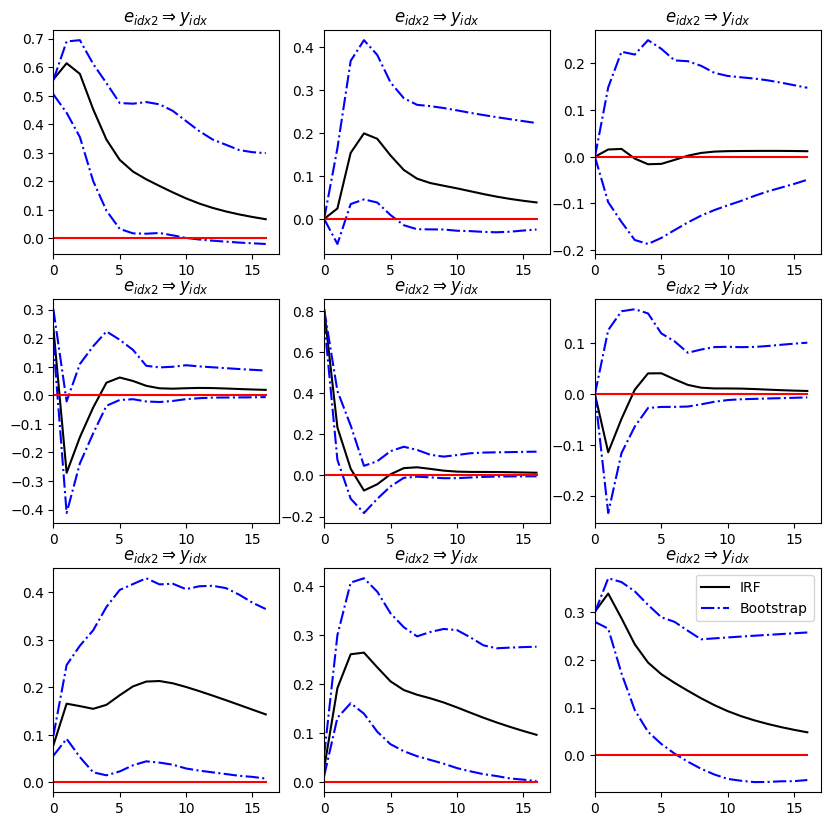

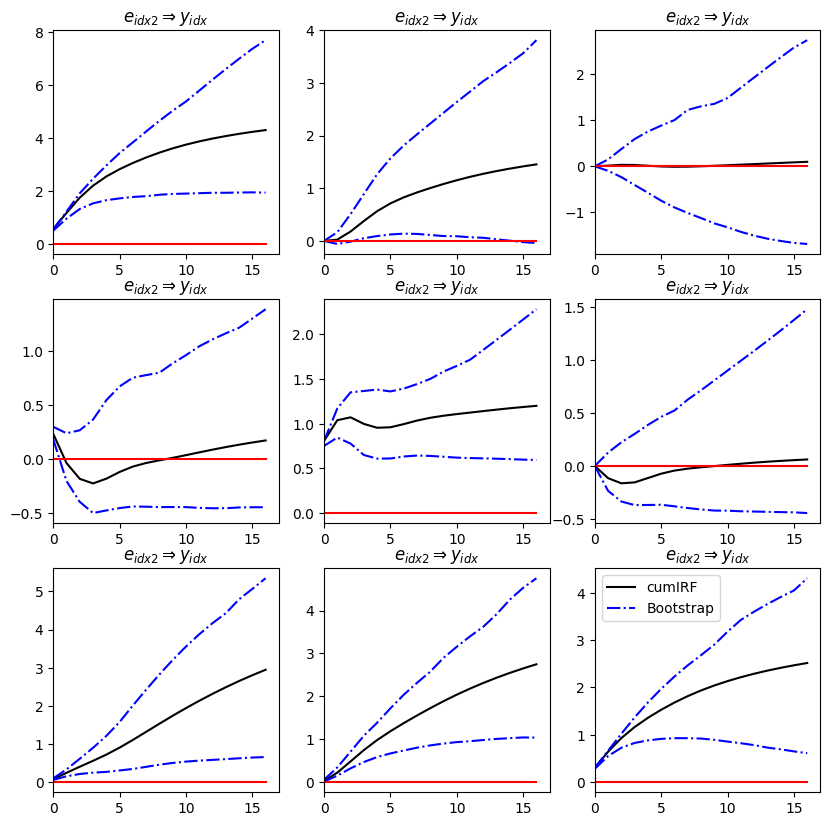

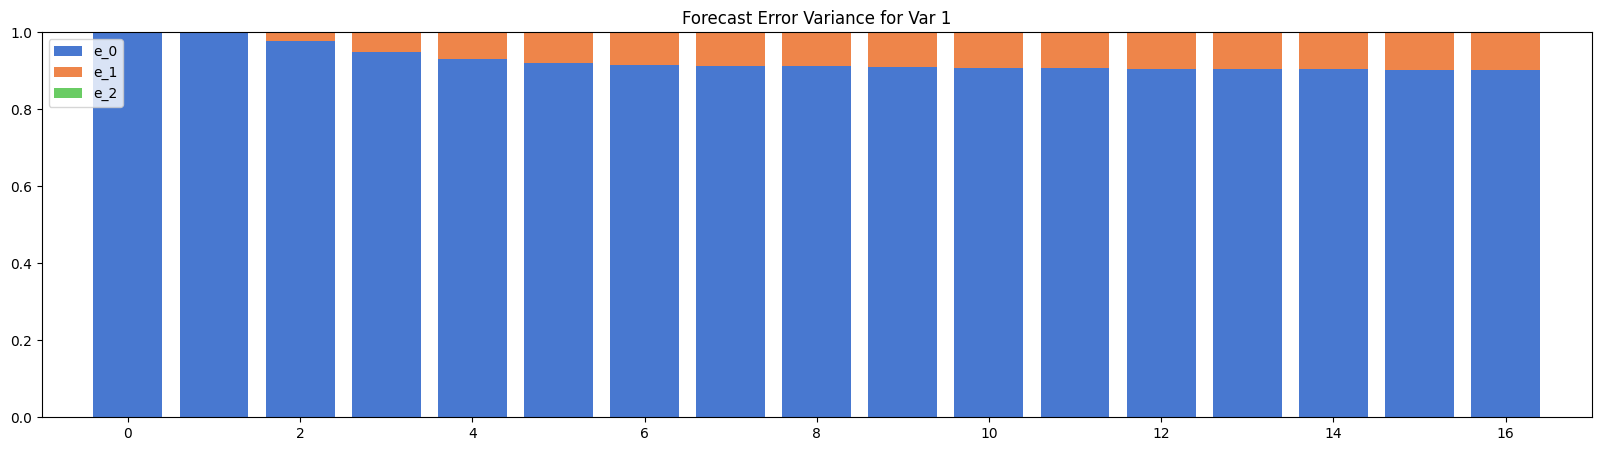

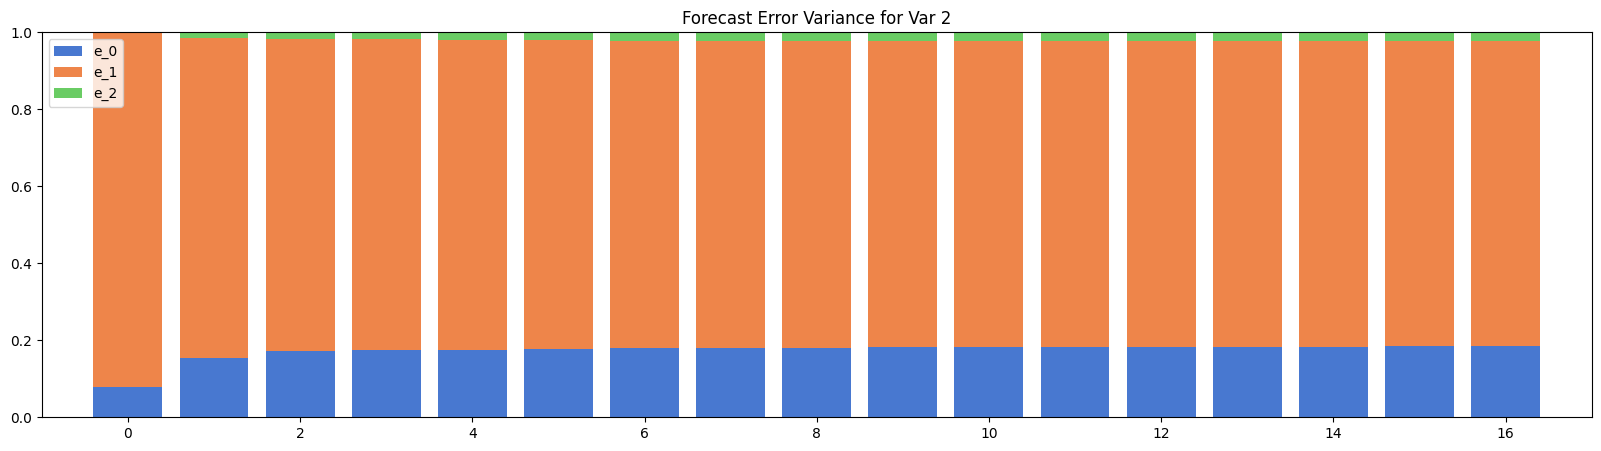

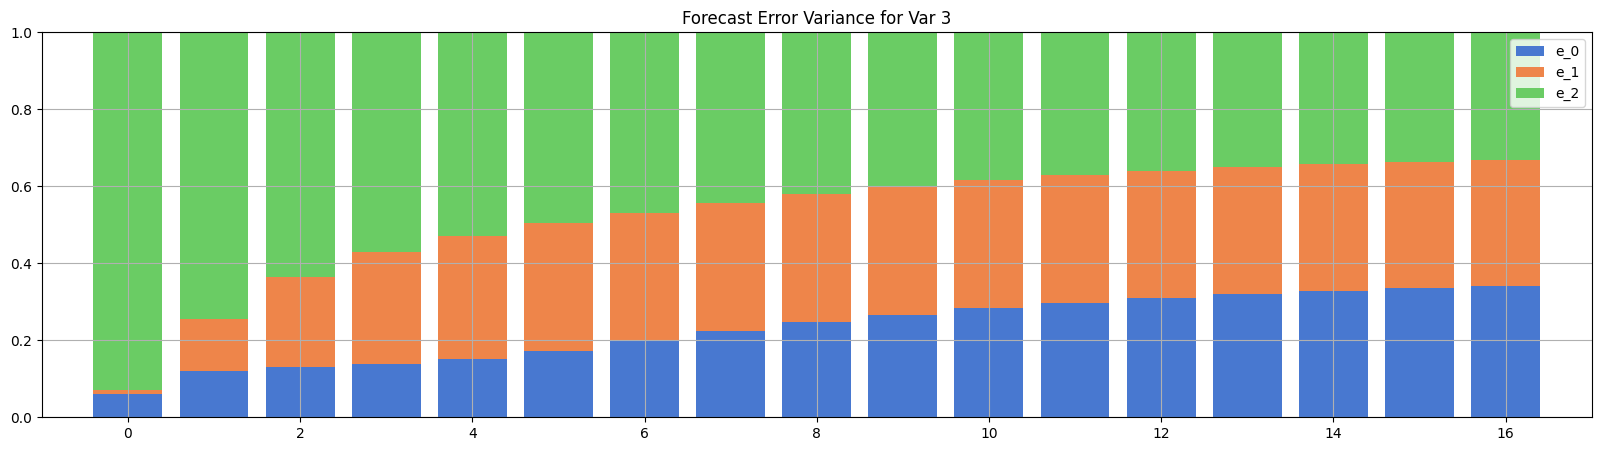

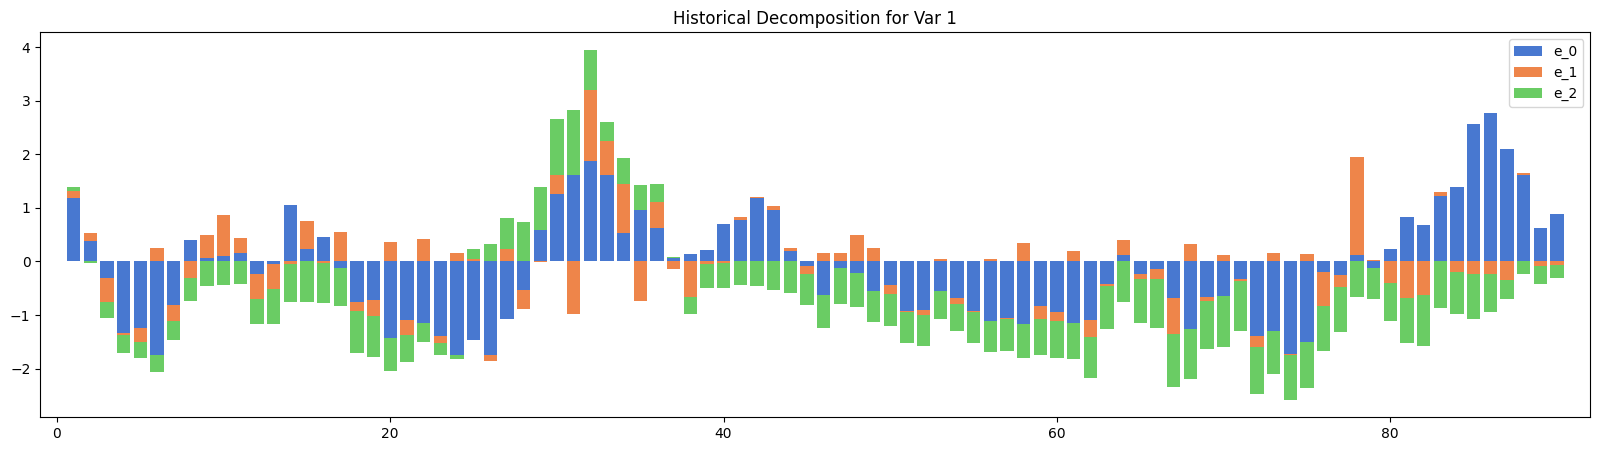

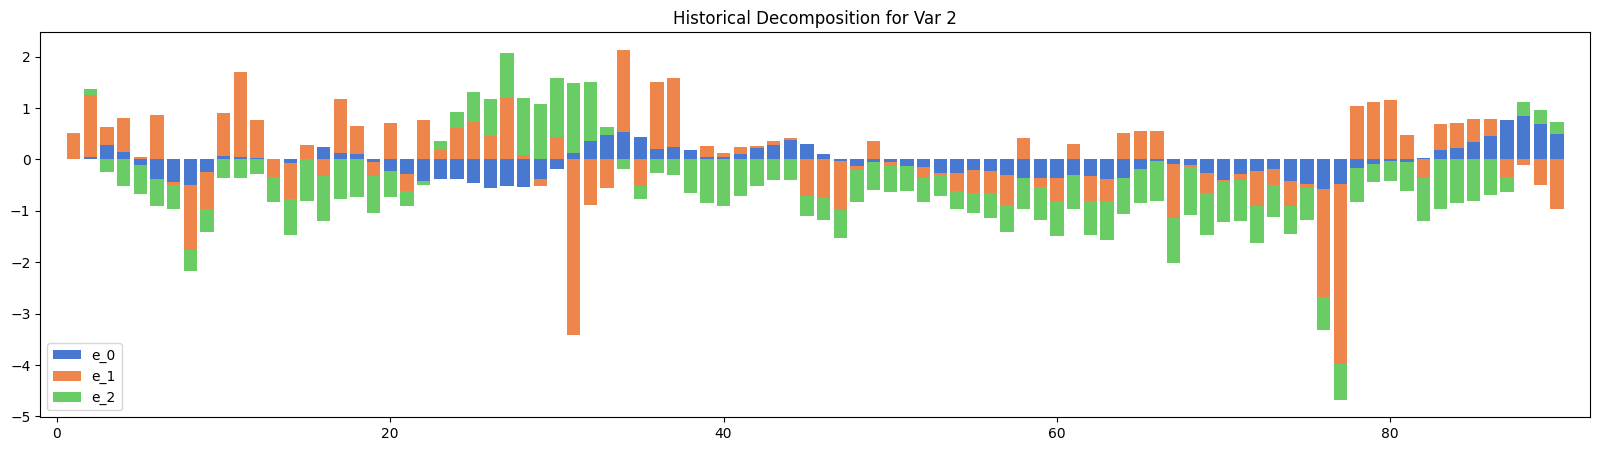

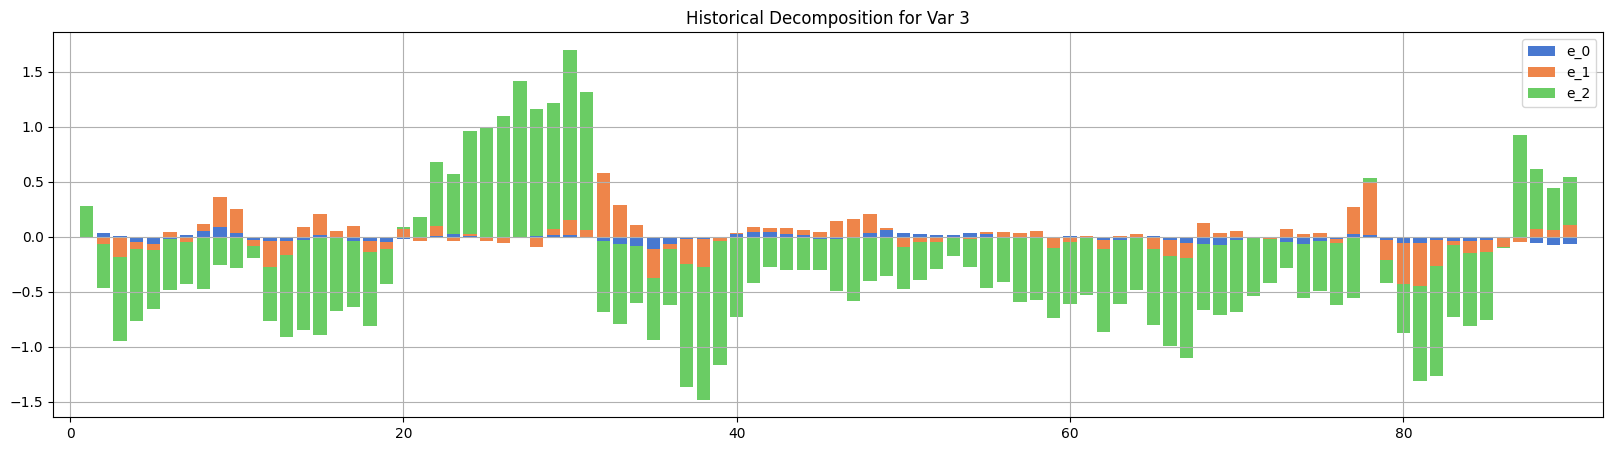

In [31]:
H = 16 # IRF horizon
qt = 90 # 90 percent confidence interval
restrict = 'short'

Theta, CILv, CIHv, cumTheta, cumCILv, cumCIHv, ForVar, HDm = bp.SVAR(y,H,restrict,qt,p_bic)

우선 검정색 실선은 충격반응함수로 식별된 3가지 구조 충격이 각 내생변수에 미치는 영향을 나타낸다. 이때, 파란색 점선은 해당 충격반응함수의 90\% 신뢰구간으로 빨간선이 신뢰구간에 포함될 경우 충격반응함수가 통계적으로 유의하지 않음을 의미한다.

위 결과에 대한 이론적인 가정은 다음과 같다. 우선 $y$ 변수를 구성하는 내생변수의 순사인
$\begin{equation}
    \begin{pmatrix}
        inflation & \Delta rgdp & interest\text{ }rate
    \end{pmatrix}^{\prime} \notag
\end{equation}$
는 다음과 같은 인과관계의 고리 (causal chain)을 가정하고 있다.
$\begin{equation}
    \begin{pmatrix}
        u_{t}^{inf} \\
        u_{t}^{\Delta rgdp} \\
        u_{t}^{int}
    \end{pmatrix} = \begin{pmatrix}
        b_{11}^{0} & 0 & 0 \\
        b_{21}^{0} & b_{22}^{0} & 0 \\
        b_{31}^{0} & b_{32}^{0} & b_{33}^{0}
    \end{pmatrix}\begin{pmatrix}
        e_{t}^{AS} \\
        e_{t}^{AD} \\
        e_{t}^{MP}
    \end{pmatrix} \tag{1}
\end{equation}$
또는
$\begin{align}
    & u_{t}^{inf} = b_{11}^{0}e_{t}^{AS} \tag{2} \\
    & u_{t}^{\Delta rgdp} = b_{21}^{0}e_{t}^{AS} + b_{22}^{0}e_{t}^{AD} \tag{3} \\
    & u_{t}^{int} = b_{31}e_{t}^{AS} + b_{32}e_{t}^{AD} + b_{33}^{0}e_{t}^{MP} \tag{4}
\end{align}$
이때, 식 (2)부터 (4)까지를 통해 구조형 VAR 모형에 다음과 같은 가정이 내포되었다는 것을 알 수 있다.
    
1. 공급 충격으로 이름 지어진 첫 번째 구조 충격이 인플레이션 (가격)과 실질 GDP 성장률 (산출량) 모두에 영향을 미치는 것은 총수요-총공급 (AD-AS) 모형에서 수평적인 AS 곡선의 이동을 가정하기 때문이다.
2. 수요 충격으로 이름 지어진 두 번째 구조 충격이 인플레이션 (가격)에만 영향을 미치는 것은 하방하는 AD 곡선의 이동을 가정하기 때문이다.
3. 외생적인 통화 정책 충격으로 이름 지어진 세 번째 구조 충격이 이자율에만 영향을 미치는 것은 공급 충격과 수요 충격에 포함되지 않는 순수한 통화 정책 충격을 가정하기 때문이다.

이러한 이론적 가정에 입각하여 각 변수에 대한 충격반응함수 이미지에 대해 다음과 같이 해석할 수 있다. 첫째로, 양의 총공급 충격은 경제 이론과 일치하게 인플레이션에 대하여 단기적인 증가와 점진적인 감소로 이어진다. 하지만, 이런 충격은 산출량의 성장률에 대해서는 통계적으로 유의하지 않지만, 단기적인 증가로 이어져 경제 이론과 모순된 결과를 보인다. 둘째로, 양의 총수요 충격은 단기적인 산출량 성장률의 증가로 이어져 AD-AS 모형의 결과와 일치하지만 그 장기적인 효과는 통계적으로 유의하지 않다. 반면, 양의 총수요 충격은 점진적인 인플레이션으로 이어지는데, 이는 통계적으로 유의하지 않을 뿐만 아니라 경제 이론과도 반대된다. 마지막으로 이자율과 관련하여 양의 총공급 충격은 경기 호황기의 이자율 증가로 이어질 가능성이, 양의 총수요 충격은 인플레이션에 대한 대응으로 이자율 증가로 이어질 가능성이 높다. 위 (3,1) 및 (3,2) 위치의 이미지를 통해 이러한 주장에 대한 실증적 근거를 제공한다. 반면, 이자율에 대한 이재아류 충격의 영향은 단기적인 증가 및 점진적인 효과 감소로 이어지는 것을 확인할 수 있다.


#### 예시 (장기제약을 통한 구조형 VAR 모형 식별)
한편, 이전과 같은 설정 하에서 구조형 VAR 모형을 장기제약을 사용하여 식별한다고 가정하는 경우, 단기제약을 사용한 식별과는 다른 충격반응함수가 나타날 수 있다. `restrict=long`이라고 바꾸고 동일한 `VAR_IRF_Boot` 함수를 사용하였을 때의 결과는 아래와 같다.

 
사용자가 입력한 VAR 최적 시차 =  2


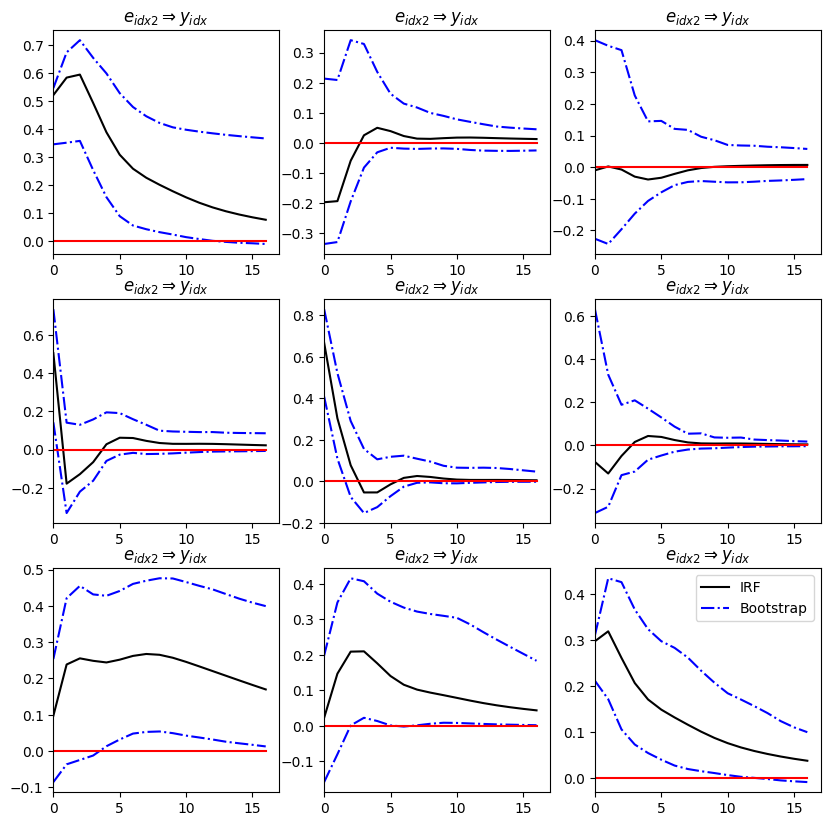

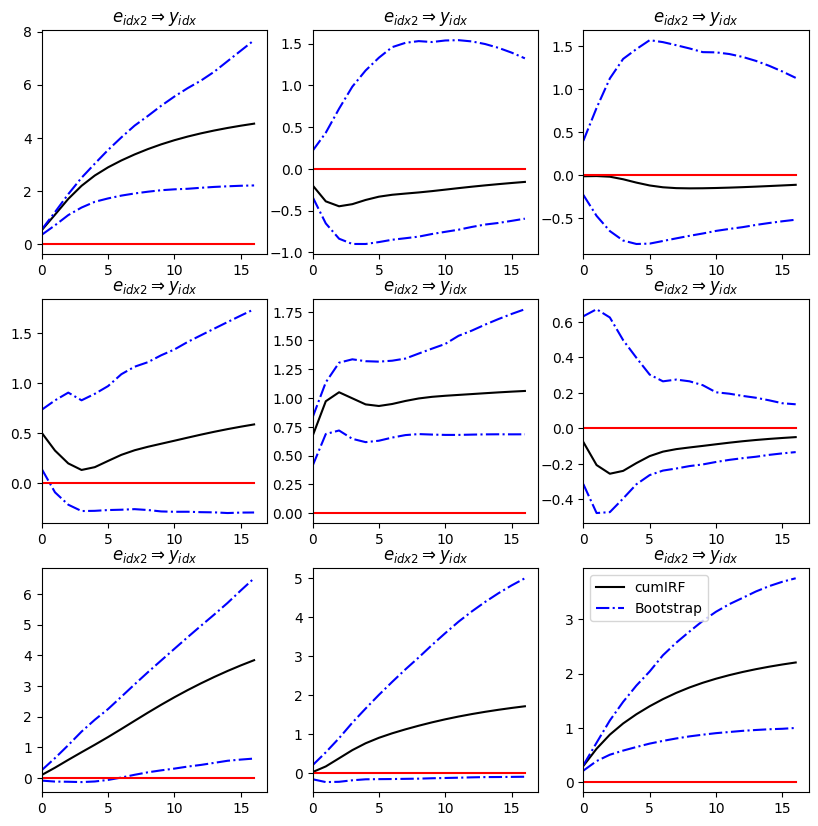

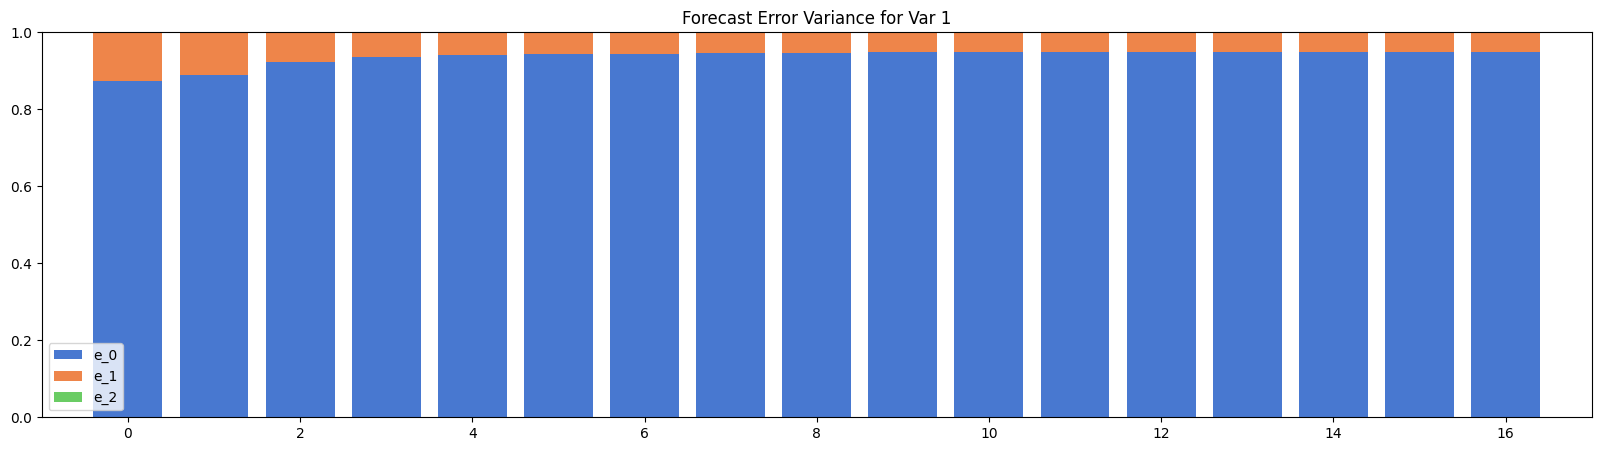

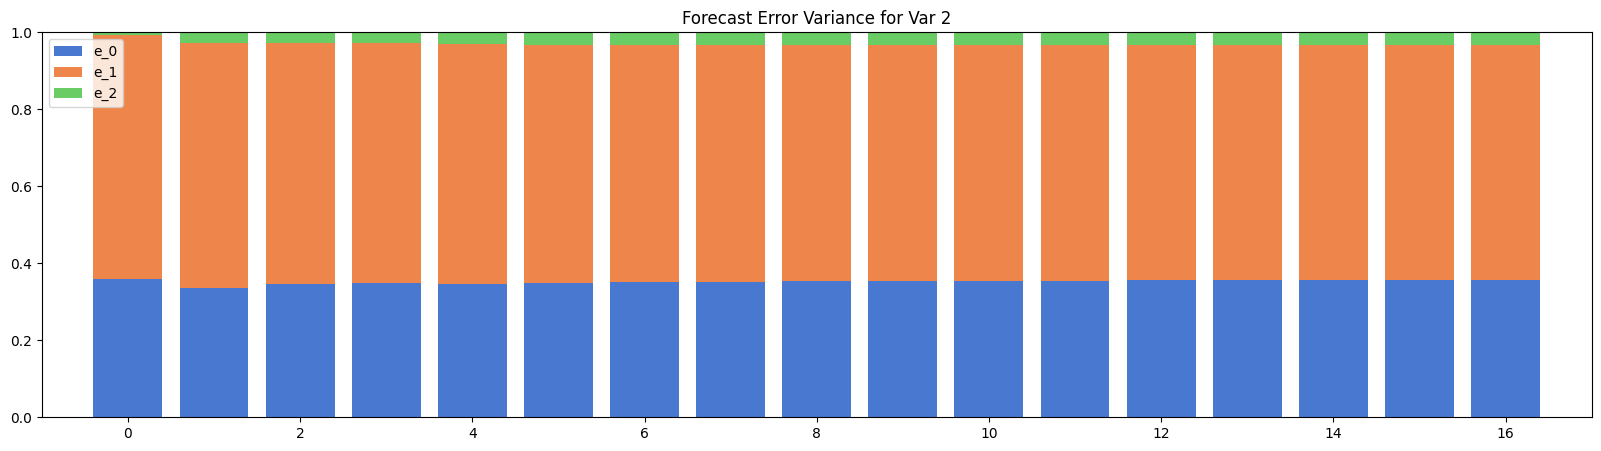

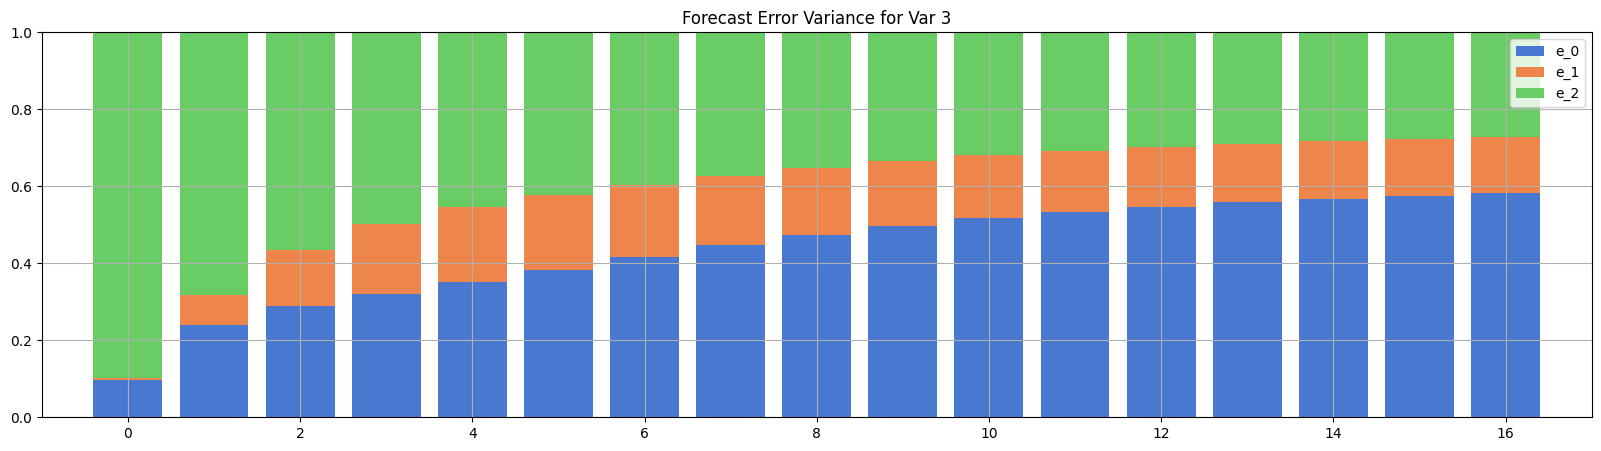

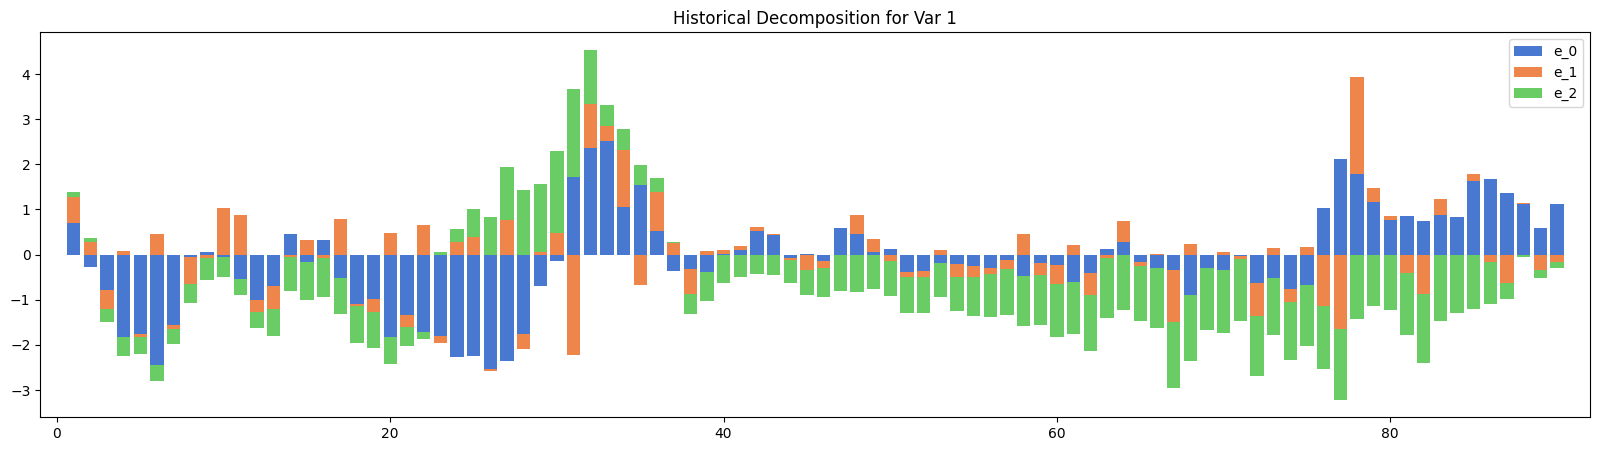

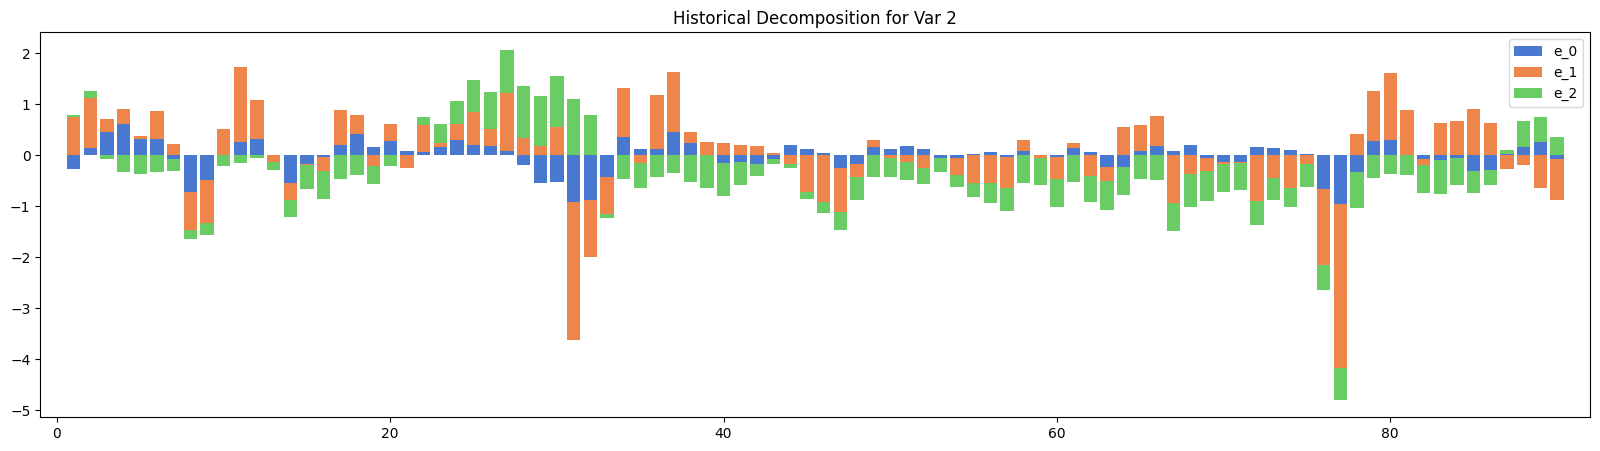

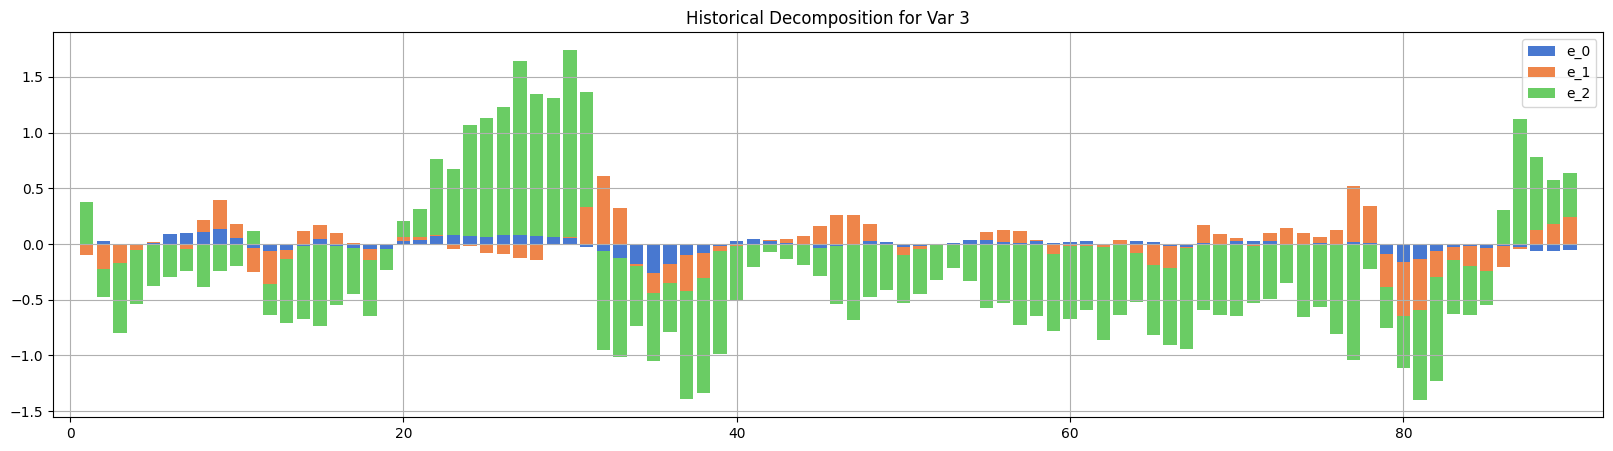

In [32]:
restrict = 'long'

Theta, CILv, CIHv, cumTheta, cumCILv, cumCIHv, ForVar, HDm = bp.SVAR(y,H,restrict,qt,p_bic)

#### 예시 (Blanchard and Quah, 1988)
장기제약을 사용하여 구조형 VAR 모형을 식별하는 방법은 Blanchard and Quah (1989)에서 가장 먼저 제시하였다. 이를 다음과 같이 replicate 할 수 있다.

우선 bqdataset.xlsx로 저장된 데이터를 불러오자. 해당 데이터는 GNP 성장률과 실업률로 구성된다. 데이터는 1950년 2분기부터 1987년 4분기까지의 분기별 데이터를 사용하며 GNP 성장률은 전기 대비 성장률 값, 실업률은 월별 데이터의 분기별 평균값으로 구성되었다.

In [35]:
bqdataset = pd.read_excel('./test_data/python_data.xlsx', sheet_name='BQdata')
bqdata = pd.DataFrame(bqdataset)
bqT, bqK = bqdata.shape
bqdata.columns = ['Date', 'rGDP', 'unemp']
bqdata = bqdata.drop(columns='Date')
bqdata = bp.matrix(bqdata)
bqdata = bqdata[8:,:].copy()
bqy = bqdata.copy()
print(bqy)

[[ 1.91077175  1.56776568]
 [ 2.77658538  0.61070813]
 [ 1.90264056  0.18698392]
 [ 1.16743205 -0.57007364]
 [ 1.687332   -0.99379785]
 [ 1.29633914 -0.9508554 ]
 [-0.44755648 -0.77457962]
 [ 0.06291172 -1.09830384]
 [-1.14713966 -1.22202806]
 [-0.00935731 -0.97908561]
 [ 1.14810007 -1.40280983]
 [ 0.82770437 -1.55986738]
 [ 0.03288077 -1.71692493]
 [-1.37061043 -1.57398248]
 [-1.71566618 -0.63104003]
 [-2.30346902  0.91190242]
 [-1.30469302  1.42151153]
 [ 0.28600948  1.56445398]
 [ 0.55036838  0.90739643]
 [ 1.21225011  0.28367221]
 [ 0.18374658 -0.07338534]
 [ 0.41807063 -0.39710956]
 [-0.03286842 -0.28750044]
 [-1.10356483 -0.51122466]
 [-0.45162995 -0.36828221]
 [-0.83361334 -0.45867309]
 [ 0.19720425 -0.48239731]
 [-0.08485719 -0.70612153]
 [-0.96379005 -0.56317908]
 [-0.32135437 -0.45356996]
 [-2.46775878  0.22270582]
 [-2.95624237  1.56564827]
 [-0.36946025  2.60859072]
 [ 1.43093633  2.55153317]
 [ 1.43431359  1.56114228]
 [ 0.32809418  1.00408473]
 [ 0.98113269  0.24702718]
 

논문을 그대로 replicate 하기 위해서 `p=8`, `H=40`, 그리고 1 표준오차 밴드인 68\% 신뢰구간에 해당하는 `qt=68`이 사용되었다.

 
사용자가 입력한 VAR 최적 시차 =  8


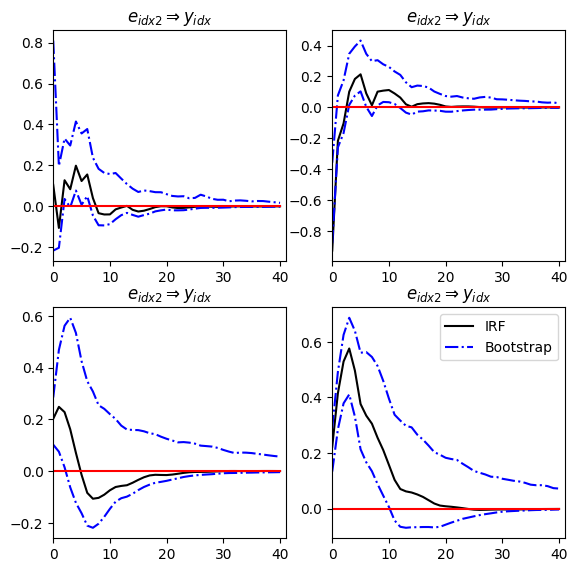

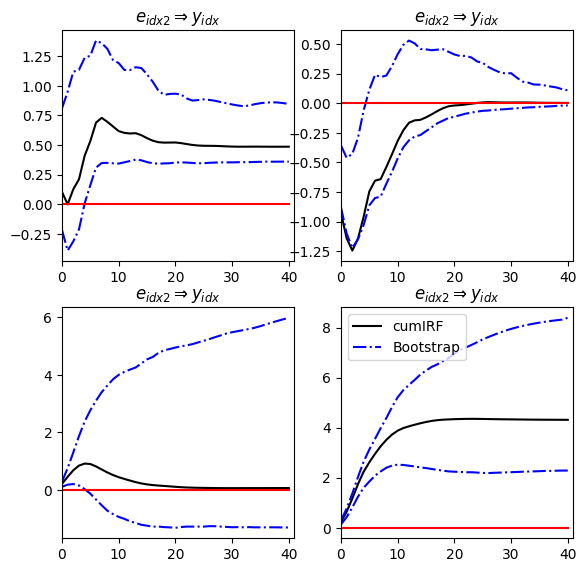

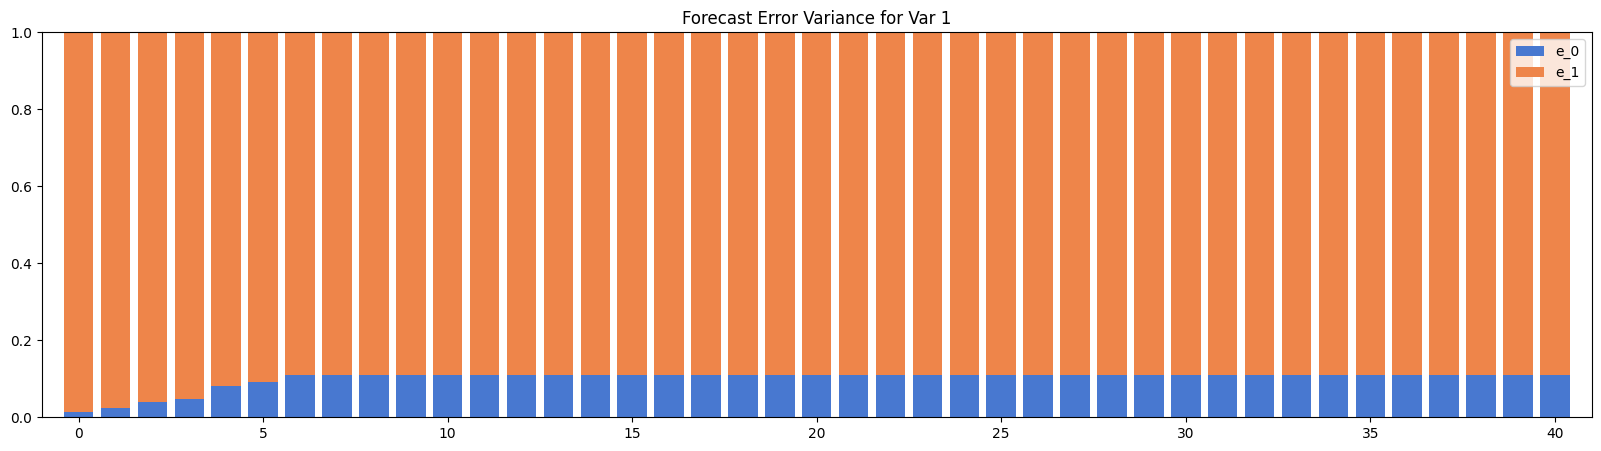

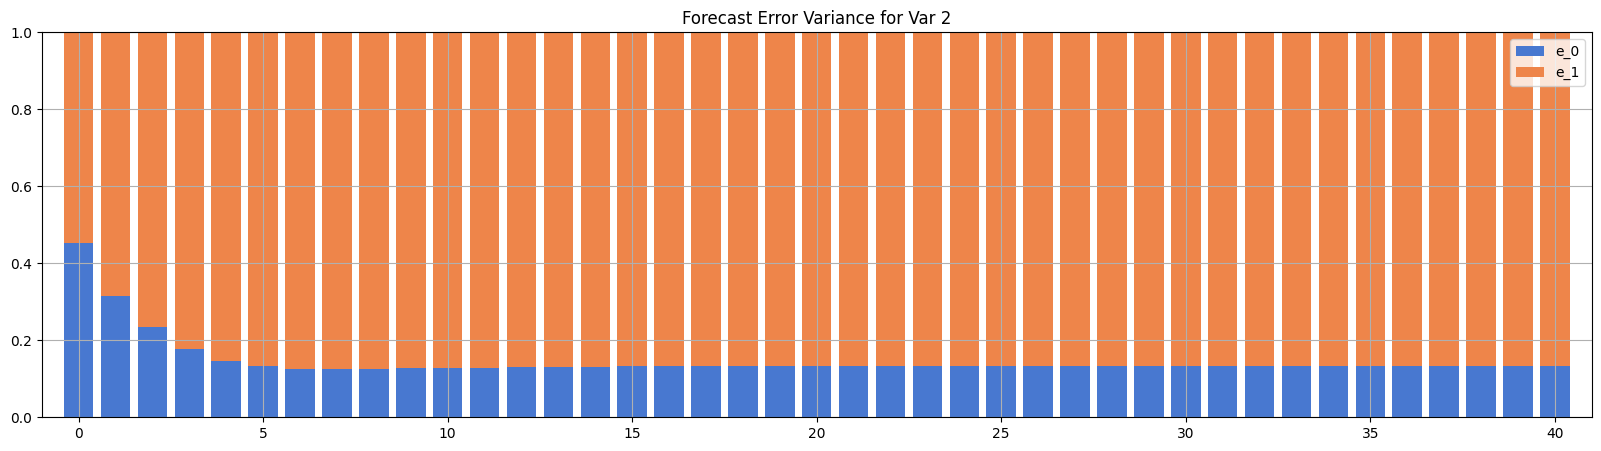

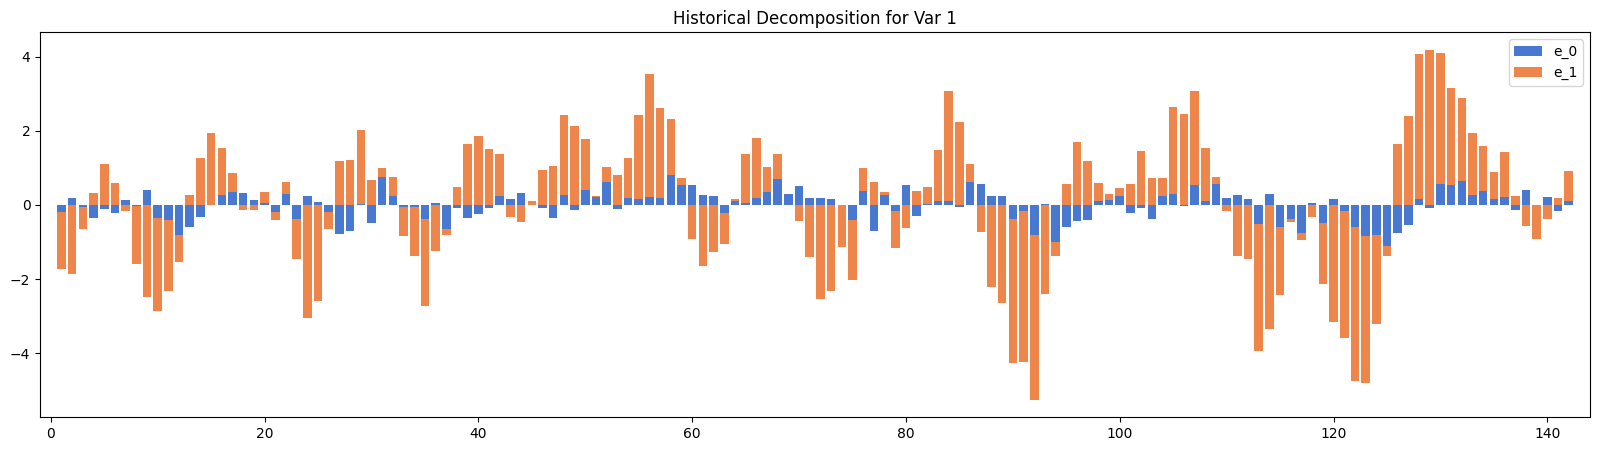

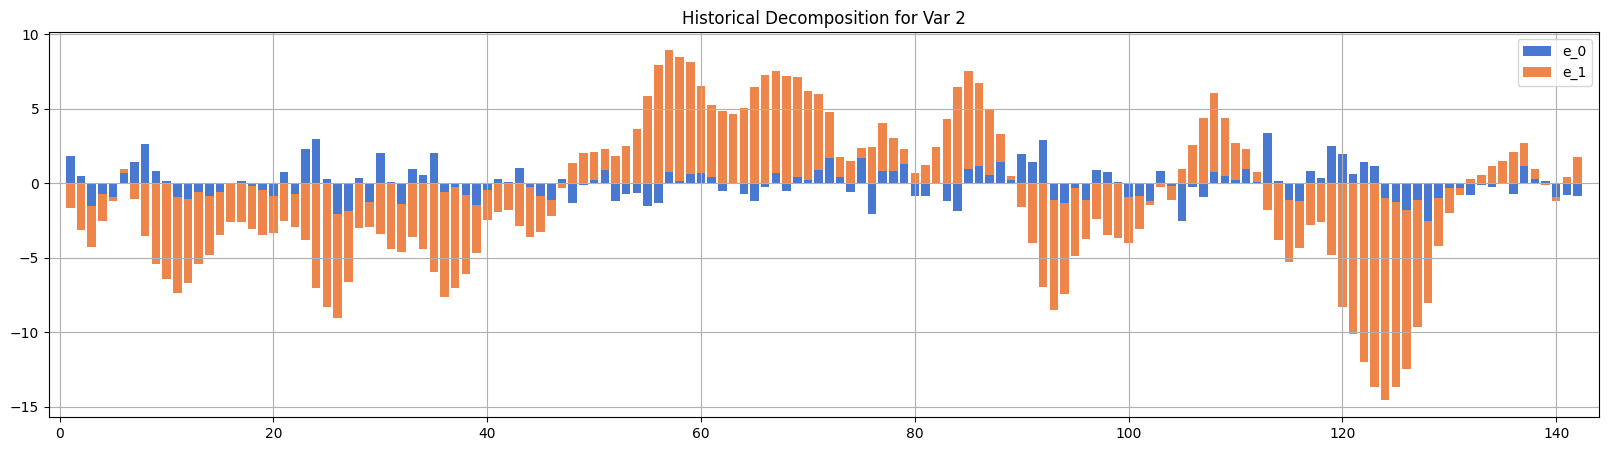

In [36]:
p = 8 # (replicated value)
H = 40 # (replicated value)
qt = 68 # 68 percent confidence interval, 1 standard deviation band (replicated value)
restrict = 'long'

Theta_bq, CILv_bq, CIHv_bq, cumTheta_bq, cumCILv_bq, cumCIHv_bq, ForVar_bq, HDm_bq = bp.SVAR(bqy,H,restrict,qt,p)

충격반응함수 중에서 첫번째는 Blanchard and Quah (1989)의 Figure 3부터 Figure 6까지의 충격반응함수와 다르다. 이는 아래와 같은 이유 때문이다.
1. 누적된 충격반응함수가 아니기 때문

우선, 두 변수 중에서 실질 GNP 성장률의 경우 차분된 값으로 누적된 충격반응함수를 도출해야한다. 이런 이유로 아래와 같이 두 변수에 대한 누적된 충격반응함수를 도출할 경우 각 구조충격이 실질 GNP 수준에 미치는 영향은 Blanchard and Quah (1989)의 Figure 4와 일치하고 Figure 3과 유사한 것을 알 수 있다.
특히, 총수요 충격인 $e_{2t}$에 대한 실질 GNP 수준에 미치는 영향의 누적된 충격반응함수는 Figure 3을 뒤집어놓은 모양인 것을 확인할 수 있다. 이는 아래의 두번째 이유와 관련이 있다.

2. 춀레스키 분해의 결과가 유일하지 않기 때문

예를 들어, 춀레스키 분해 결과 $\underline{L}$이 다음과 같이 나왔다고 하자.
$\begin{equation}
    \underline{L}\underline{L}^{\prime} = \begin{pmatrix}
    a & 0 \\
    b & c
    \end{pmatrix}\begin{pmatrix}
    a & b \\
    0 & c
    \end{pmatrix} \notag
\end{equation}$
즉, 춀레스키 분해 전의 행렬은 다음과 같다.
$\begin{equation}
    \begin{pmatrix}
        a^{2} & ab \\
        ab & b^{2}+c^{2}
    \end{pmatrix} \notag
\end{equation}$
하지만, $\underline{L}$이라는 춀레스키 분해 결과의 원소들의 부호를 다음과 같이 바꾼다면 동일한 행렬을 도출할 수 있다.
$\begin{equation}
    \begin{pmatrix}
        -a & 0 \\
        -b & c
    \end{pmatrix}\text{, }\begin{pmatrix}
        a & 0 \\
        b & -c
    \end{pmatrix}\text{, }\begin{pmatrix}
        -a & 0 \\
        -b & -c
    \end{pmatrix} \notag
\end{equation}$
이러한 이유로 춀레스키 분해 결과 도출된 $\Theta(1)$에 대한 $(2,2)$ 원소에 음수를 취한 값을 선택한다면 Blanchard and Quah (1989)와 정확히 동일한 결과를 얻을 수 있다.

## 6. 일반화된 충격반응함수 (Generalized IRF) 도출

#### 구문
`bp` 패키지 속의 `VAR_GenIRF`라는 함수를 사용하면 VAR(p) 모형의 일반화된 충격반응함수 (Generalized IRF) 및 부트스트래핑을 통한 충격반응함수의 신뢰구간을 도출할 수 있다. 이때, `VAR_GenIRF`라는 함수는 다음과 구성되어 있다.

> *<p style="font-size:20px">`Theta, CILv, CIHv, cumTheta, cumCILv, cumCIHv = bp.VAR_GenIRF(y, H, qt=None, p=None)`</p>*
> *<p style="font-size:15px">VAR(p) 모형의 일반화된 충격반응함수 (Generalized IRF) 및 부트스트래핑 (Bootstrapping)을 통한 충격반응함수의 신뢰구간 도출</p>*
> - **입력**:
</br></br>
    `y`: VAR(p) 모형에 사용되는 반응변수
    </br></br>
    `H`: 충격반응함수 도출 시 고려하는 최대 예측시차
    </br></br>
    `qt`: 충격반응함수의 신뢰구간 (default = 90, 90\% 신뢰구간)
    </br></br>
    `p`: VAR(p) 모형의 최적 시차 (default = None)
    </br></br>
> - **출력**:
</br></br>
    `Theta`: 추정된 VAR(p) 모형의 충격반응함수
    </br></br>
    `CILv`: 충격반응함수 신뢰구간의 하한
    </br></br>
    `CIHv`: 충격반응함수 신뢰구간의 상한
    </br></br>
    `cumTheta`: 추정된 VAR(p) 모형의 누적된 충격반응함수
    </br></br>
    `cumCILv`: 누적된 충격반응함수 신뢰구간의 하한
    </br></br>
    `cumCIHv`: 누적된 충격반응함수 신뢰구간의 상한
    </br></br>
> - **함께 사용되는 함수**:
    </br></br>
    `OLS_VAR`: 다변량 VAR(p) 모형에 대한 OLS 추정
    </br></br>
    `irf_estimate`: 충격반응함수 추정
    </br></br>
    `randper`: 무작위 변수 순서 변경
    </br></br>

#### 이론
Pesaran and Shan (1998)에서 처음 제안된 일반화된 충격반응함수 (Generalized Impulse Response Function)는 연구자의 목적이 VAR 모형을 사용한 예측이거나 축약형 충격에 대한 반응변수들의 반응을 보는 것일 때 사용된다. 이때, 축약형 충격을 사용하기 때문에 축약형 모형을 추정한 이후, 이전과 같이 구조형 충격을 식별하기 위한 별도의 식별 절차가 필요하지 않다는 것이 특징이다.

우선, 다음과 같은 축약형 VAR 모형을 생각해보자.
\begin{align}
    y_{t} & = A(L)^{-1}u_{t} = \Psi(L)u_{t}\text{, }u_{t}\sim WN(0,\Sigma) \notag \\
    & = u_{t} + \Psi_{1}u_{t-1} + \Psi_{2}u_{t-2} + \cdots \tag{1}
\end{align}

$I_{t-1}$을 $t-1$ 시점까지 알려진 변수들의 정보라고 하자. 그럼 우리의 목적은 $I_{t-1}$이 주어질 때, $t$기의 특정 축약형 충격 $u_{t}=\delta$이 $y_{t+h}$ 변수에 미치는 영향으로 정의된 일반화된 충격반응함수를 보는 것이다. 이를 수식으로 표현하면 다음과 같다.
\begin{equation}
    GI(h,\delta,I_{t-1}) = \mathbb{E}(y_{t+h}|u_{t}=\delta\text{,}I_{t-1})-\mathbb{E}(y_{t+h}|I_{t-1}) \tag{2}
\end{equation}

식 (1)을 사용하여 식 (2)의 우변의 각 항을 
\begin{align}
    & y_{t+h} = \underbrace{u_{t+h}+\Psi_{1}u_{t+h-1}+\Psi_{2}u_{t+h-2}+\cdots+\Psi_{h-1}u_{t+1}}_{\text{정보집합에 포함되지 않은 부분}}+\underbrace{\Phi_{h}u_{t}+\Psi_{h+1}u_{t-1}+\cdots}_{\text{정보집합에 포함된 부분}} \notag \\
    & \Rightarrow \mathbb{E}(y_{t+h}|I_{t-1})=0 + \mathbb{E}(\Psi_{h}u_{t}+\Psi_{h-1}u_{t-1}+\cdots|I_{t-1}) \notag
\end{align}
그리고
\begin{equation}
    \mathbb{E}(y_{t+h}|u_{t}=\delta\text{, }I_{t-1}) = 0 + \mathbb{E}(\Psi_{h}\delta+\Psi_{h+1}u_{t-1}+\cdots|I_{t-1}) \notag
\end{equation}
와 같이 표현할 수 있다. 따라서, 우리가 목적으로 하는 일반화된 충격반응함수는 다음과 같이 표현된다.
\begin{equation}
    GI(h,\delta,I_{t-1}) = \Psi_{h}\cdot\delta \notag
\end{equation}

Pesaran and Shin (1998)는 $\delta$를 구성하고 있는 한 개의 구조충격만 변화하는 경우, 즉 $u_{it}=\delta_{i}$인 경우를 고려하였다. 그 결과, 일반화된 충격반응함수는 다음과 같이 수정되어 표현될 수 있다.
\begin{align}
    GI(h,\delta_{i},I_{t-1}) & = \mathbb{E}(y_{t+h}|u_{it}=\delta_{i}\text{, }I_{t-1}) - \mathbb{E}(y_{t+h}|I_{t-1}) \notag \\
    & = \Psi_{h}\mathbb{E}(u_{t}|u_{it}=\delta_{i}\text{, }I_{t-1}) \notag
\end{align}
$u_{t}$가 다변량 정규분포를 따른다고 가정하면, $u_{it}=\delta_{i}$가 주어질 경우 $u_{t}$의 조건부 기댓값은 다음과 같이 표현될 수 있다.
\begin{align}
    \mathbb{E}(u_{t}|u_{it}=\delta_{i}\text{, }I_{t-1}) = \begin{pmatrix}
        \mathbb{E}(u_{1t}|u_{it}) \\
        \vdots \\
        \mathbb{E}(u_{nt}|u_{it})
    \end{pmatrix} & = \begin{pmatrix}
        \sigma_{1i} \\
        \vdots \\
        \sigma_{ni}
    \end{pmatrix}\cdot\frac{\delta_{i}}{\sigma_{ii}} \notag \\
    & = \Sigma_{\mathrm{1}_{i}}\cdot\frac{\delta_{i}}{\sigma_{ii}} \notag
\end{align}
이때, $\sigma_{ij}$는 축약형 충격 $u_{t}$들의 분산-공분산 행렬 $\Sigma$의 (i,j) 번째 원소를 의미한다. $\delta=\sqrt{\sigma_{ii}}$라고 가정하면, 일반화된 충격반응함수는 다음과 같이 표현할 수 있다.
\begin{align}
    GI(h,\delta_{i},I_{t-1}) & = \Phi_{h}\cdot\begin{pmatrix}
        \Sigma_{\mathrm{1}_{1}}\cdot\sigma_{11}^{-\frac{1}{2}} \notag \\
        \vdots \\
        \Sigma_{\mathrm{1}_{n}}\cdot\sigma_{nn}^{-\frac{1}{2}}
    \end{pmatrix} \notag \\
    & = \begin{pmatrix}
        \Phi_{h}\Sigma_{\mathrm{1}_{1}} \\
        \vdots \\
        \Phi_{h}\Sigma_{\mathrm{1}_{n}}
    \end{pmatrix}\cdot diag(\sigma_{11}^{-\frac{1}{2}},\cdots,\sigma_{nn}^{-\frac{1}{2}}) \notag \\
    & = \Phi_{h}\cdot\Sigma\cdot diag(\sigma_{11}^{-\frac{1}{2}},\cdots,\sigma_{nn}^{-\frac{1}{2}}) \notag \\
    & = \Phi_{h}\cdot(\Sigma_{\mathrm{1}_{i}})\cdot\frac{1}{\sqrt{\sigma_{ii}}} \notag
\end{align}
이때, $u_{it}$가 $\sqrt{\sigma_{ii}}$만큼 변화한다는 것이 유일한 충격의 변화분이기 때문에, 일반화된 충격반응함수는 $h$기 이후의 설명변수들에 대한 1 표준편차 충격의 영향을 의미한다.


#### 예시
이전과 같이 $y_{t}=(inf_{t}\text{, }\Delta rgdp_{t}\text{, }int_{t})^{\prime}$라는 반응변수 벡터를 사용하여 VAR(p) 모형의 일반화된 충격반응함수와 부트스트래핑으로 추정한 일반화된 충격반응함수의 신뢰구간을 도출할 수 있다. 이때, BIC로 추정한 VAR(p) 모형의 최적 시차는 `p_bic=2`이고, 충격반응함수 추정을 위해 총 20기 이후까지를 예측한다고 하자. 나아가 부트스트래핑으로 일반화된 충격반응함수의 95\% 신뢰구간을, 총 2000번의 반복을 통해 추정한다고 하자.

In [ ]:
p = p_bic
H = 20 # IRF horizon
qt = 95 # 95 percent confidence interval
restrict = 'general'

Theta_gen, CILv_gen, CIHv_gen, cumTheta_gen, cumCILv_gen, cumCIHv_gen, ForVar_gen, HDm_gen = bp.SVAR(y,H,restrict,qt,p)

## 7. 예측오차 분산 분해 (Forecast Error Variance Decomposition)

#### 구문
`bp` 패키지 속의 `VarDecomp`라는 함수를 사용하면 VAR(p) 모형의 예측오차 분산 분해 결과를 도출할 수 있다. 이때, `VarDecomp`라는 함수는 다음과 구성되어 있다.

> *<p style="font-size:20px">`ForVar = bp.VarDecomp(phi_hat,Omega_hat,F,restrict,p,H)`</p>*
> *<p style="font-size:15px">VAR(p) 모형의 예측오차 분산분해 결과 도출</p>*
> - **입력**:
</br></br>
    `phi_hat`: 축약형 VAR(p) 모형의 계수 행렬 추정량
    </br></br>
    `Omega_hat`: 축약형 VAR(p) 모형의 분산-공분산 행렬 추정량
    </br></br>
    `F`: VAR(p) 모형의 동반행렬 (companion matrix) 형태의 계수 행렬 추정치
    </br></br>
    `restrict`: 사용하고자하는 식별 방법 (`short`=단기제약, `long`=장기제약)
    </br></br>
    `p`: VAR(p) 모형의 최적 시차
    </br></br>
    `H`: 예측 오차 도출 시 사용되는 예측 시차
    </br></br>
> - **출력**:
</br></br>
    `ForVar`: 예측 오차 분산 분해 결과
    </br></br>


#### 이론
예측오차 분산 분해 (Forecast Error Variance Decomposition)의 목적은 VAR 시스템을 구성하는 각 변수의 예측오차에 특정 구조충격이 얼마만큼 기여하는지 보는 것이다. 다음과 같이 잘 식별되고 선형 과정으로 표현 가능한 구조형 VAR 모형이 있다가 하자.
\begin{align}
    y_{t} & = B_{0}^{-1}B_{1}y_{t-1} + \cdots + B_{0}^{-1}B_{p}y_{t-p}+B_{0}^{-1}e_{t} \notag \\
    & = \theta_{0}e_{t} + \theta_{1}e_{t-1} + \theta_{2}e_{t-2} + \cdots \notag \\
    & = \sum_{j=0}^{\infty}{\theta_{j}e_{t-j}}\text{, }e_{t}\sim\mathcal{N}(0,I_{k}) \notag
\end{align}
이때, 정보집합 $I_{t}$가 주어질 경우 $t$기에 하는 $h$기 이후 최적 예측은
\begin{align}
    & y_{t+h} = \underbrace{\theta_{0}e_{t+h} + \theta_{1}e_{t+h-1}+\cdots+\theta_{h-1}e_{t+1}}_{\text{정보집합에 포함되지 않은 부분}}+\underbrace{\theta_{h}e_{t}+\theta_{h+1}e_{t-1}+\cdots}_{\text{정보집합에 포함된 부분}} \notag \\
    & \Rightarrow \mathbb{E}(y_{t+h}|I_{t}) = \theta_{h}e_{t} + \theta_{h+1}e_{t-1} + \theta_{h+2}e_{t-2}+\cdots \notag
\end{align}
와 같다. 이를 사용하여 예측오차를 구한다면 다음과 같다.
\begin{align}
    \varepsilon_{t,h} & = y_{t+h} - \mathbb{E}(y_{t+h}|I_{t}) \notag \\
    & = \theta_{0}e_{t+h} + \cdots+\theta_{h-1}e_{t+1}+\theta_{h}e_{t}+\theta_{h+1}e_{t-1}+\cdots \notag \\
    & \hspace{5ex} - (\theta_{h}e_{t}+\theta_{h+1}e_{t-1}+\cdots) \notag \\
    & = \theta_{0}e_{t+h} + \theta_{1}e_{t+h-1} + \cdots + \theta_{h-1}e_{t+1} \notag \\
    & = \sum_{i=0}^{h-1}{\theta_{i}e_{t+h-i}} \notag
\end{align}
더 나아가, 위에서 구한 예측오차의 분산은 다음과 같이 도출할 수 있다.
\begin{align}
    Var(\varepsilon_{t,h}) & = Var(\theta_{0}e_{t+h}+\cdots+\theta_{h-1}e_{t+1}) \notag \\
    & = \mathbb{E}[(\theta_{0}e_{t+h}+\cdots+\theta_{h-1}e_{t+1})(\theta_{0}e_{t+h}+\cdots+\theta_{h-1}e_{t+1})^{\prime}] \notag \\
    & = \mathbb{E}[\theta_{0}e_{t+h}e_{t+h}^{\prime}\theta_{0}^{\prime}+\cdots+\theta_{h-1}e_{t+1}e_{t+1}^{\prime}\theta_{h-1}^{\prime}] \notag \\
    & = \underbrace{\theta_{0}\theta_{0}^{\prime}}_{(k\times k)}+\cdots+\underbrace{\theta_{h-1}\theta_{h-1}^{\prime}}_{(k\times k)}\cdots\text{ since }\mathbb{E}(e_{t}e_{t}^{\prime})=I_{k} \notag \\
    & = \sum_{i=0}^{h-1}{\theta_{i}\theta_{i}^{\prime}} \notag
\end{align}
우리의 목적은 예측오차의 분산이기 때문에 $\theta_{i}\theta_{i}^{\prime}$의 대각 원소에만 집중하면, 위 표현은 다음과 같이 표현할 수 있다.
\begin{align}
    & Var(\varepsilon_{t,h}) \notag \\
    & = \theta_{1}\theta_{1}^{\prime} + \cdots + \theta_{h-1}\theta_{h-1}^{\prime} \notag \\
    & = \begin{pmatrix}
        \theta_{11}^{1} & \theta_{12}^{1} & \cdots & \theta_{1K-1}^{1} & \theta_{1K}^{1} \\
        \theta_{21}^{1} & \theta_{22}^{1} & \cdots & \theta_{2K-1}^{1} & \theta_{2K}^{1} \\ 
        \vdots & \vdots & \ddots & \vdots & \vdots
    \end{pmatrix}\begin{pmatrix}
        \theta_{11}^{1} & \theta_{21}^{1} & \cdots & \theta_{K-11}^{1} & \theta_{K1}^{1} \\
        \theta_{12}^{1} & \theta_{22}^{1} & \cdots & \theta_{K-12}^{1} & \theta_{K2}^{1} \\ 
        \vdots & \vdots & \ddots & \vdots & \vdots
    \end{pmatrix} + \cdots + \theta_{h-1}\theta_{h-1}^{\prime} \notag \\
    & = \begin{pmatrix}
        (\theta_{11}^{1})^{2}+\cdots+(\theta_{1K}^{1})^{2} & \cdot & \cdots \\
        \cdot & (\theta_{21}^{1})^{2}+\cdots+(\theta_{2K}^{1})^{2} & \cdots \\
        \vdots & \vdots & \ddots
    \end{pmatrix} + \cdots \notag \\
    & \hspace{5ex} + \begin{pmatrix}
        (\theta_{11}^{h-1})^{2}+\cdots+(\theta_{1K}^{h-1})^{2} & \cdot & \cdots \\
        \cdot & (\theta_{21}^{h-1})^{2}+\cdots+(\theta_{2K}^{h-1})^{2} & \cdots \\
        \vdots & \vdots & \ddots
    \end{pmatrix} \notag
\end{align}
따라서 $Var(\varepsilon_{t,h})$의 첫번째 원소는
\begin{equation}
    ((\theta_{11}^{1})^{2}+\cdots+(\theta_{1K}^{1})^{2}) + ((\theta_{11}^{2})^{2}+\cdots+(\theta_{1K}^{2})^{2}) + \cdots + ((\theta_{11}^{h-1})^{2}+\cdots+(\theta_{1K}^{h-1})^{2}) \notag
\end{equation}
와 같이 표현될 수 있다.

만약 $\theta_{jk,i}$를 $\theta_{i}$의 $(j,k)$ 번째 원소라고 한다면, $Var(\varepsilon_{t,h})$의 (j,j) 번째 원소는 $FV_{j}(h)$라고 표현할 수 있으며 우리가 목적으로 하고 있는 $y_{t+h}$의 j 번째 원소에 대한 예측오차의 분산이다. 따라서, $FV_{j}^{(k)}(h) = \sum_{i=0}^{h-1}{\theta_{jk,i}^{2}}$라고 할 때,
\begin{align}
    FV_{j}(h) & = \sum_{k=1}^{K}{\theta_{jk,0}^{2}} + \sum_{k=1}^{K}{\theta_{jk,1}^{2}}+\cdots+\sum_{k=1}^{K}{\theta_{jk,h-1}^{2}} \notag \\
    & = \sum_{i=0}^{h-1}{\sum_{k=1}^{K}{\theta_{jk,i}^{2}}} \notag \\
    & = \Bigg(\sum_{i=0}^{h-1}{\theta_{j1,i}^{2}}\Bigg) + \Bigg(\sum_{i=0}^{h-1}{\theta_{j2,i}^{2}}\Bigg) + \cdots + \Bigg(\sum_{i=0}^{h-1}{\theta_{jK,i}^{2}}\Bigg) \notag \\
    & = FV_{j}^{(1)}(h) + FV_{j}^{(2)}(h) + \cdots + FV_{j}^{(K)}(h) \notag
\end{align}
은 $y_{t+h}$의 j 번째 원소에 대한 전체 예측오차에 대한 k 번째 구조충격의 기여도를 의미한다. 그 결과, 각 예측시차 $h=0,\cdots,H$에 대해
\begin{align}
    & FV_{j}(h) = FV_{j}^{(1)}(h) + \cdots + FV_{j}^{(K)}(h) \notag \\
    & \Rightarrow 1 = \frac{FV_{j}^{(1)}(h)}{FV_{j}(h)} + \cdots + \frac{FV_{j}^{(K)}(h)}{FV_{j}(h)} \notag
\end{align}
를 도출할 수 있으며, 이는 각 예측시차 $h$에 대한 예측오차 분산 분해 결과라고 한다.

#### 예시


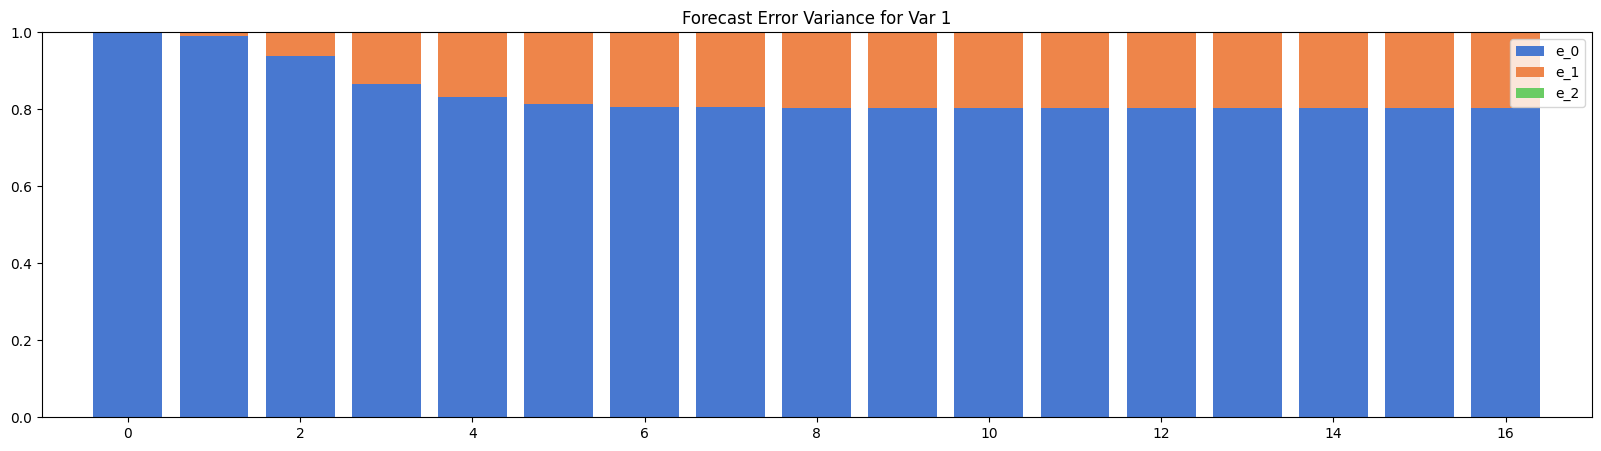

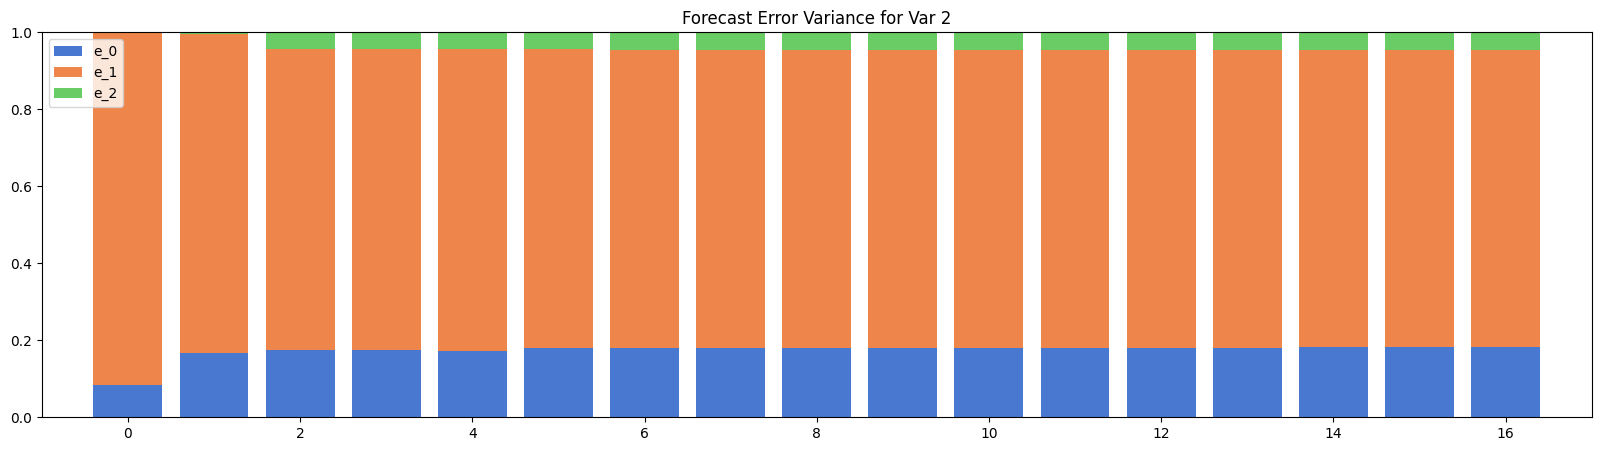

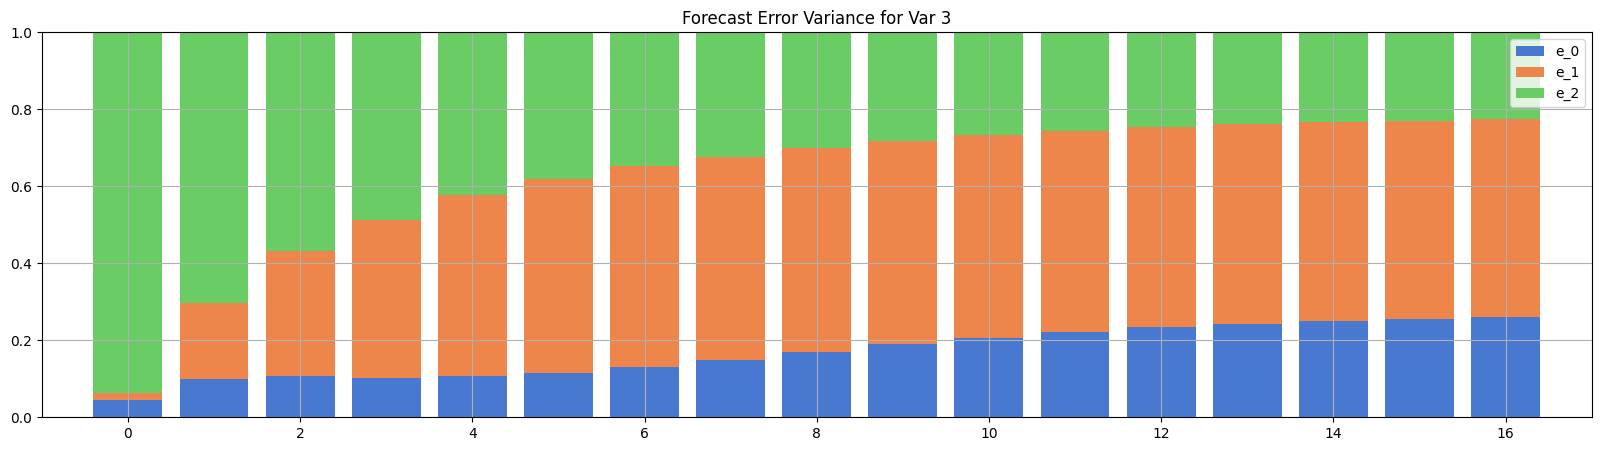

In [37]:
p = 4
H = 16
restrict = 'short'

phi_hat, Omega_hat, F, U_hat, Yhat, Y_lag, Y_predm, phat = bp.OLS_VAR(y,p)
ForVar = bp.VarDecomp(phi_hat,Omega_hat,F,restrict,p,H)

## 8. 역사적 분해 (Historical Decomposition)

#### 구문
`bp` 패키지 속의 `HistDecomp`라는 함수를 사용하면 VAR(p) 모형의 역사적 분해 결과를 도출할 수 있다. 이때, `HistDecomp`라는 함수는 다음과 구성되어 있다.

> *<p style="font-size:20px">`HDm = bp.HistDecomp(y,p,phi_hat,Omega_hat,F,U_hat,restrict)`</p>*
> *<p style="font-size:15px">역사적 분해 (Historical Decomposition)</p>*
> - **입력**:
</br></br>
    `y`: VAR(p) 모형을 구성하는 반응변수
    </br></br>
    `p`: VAR(p) 모형의 최적 시차
    </br></br>
    `phi_hat`: 축약형 VAR(p) 모형의 계수 행렬 추정량
    </br></br>
    `Omega_hat`: 축약형 VAR(p) 모형의 분산-공분산 행렬 추정량
    </br></br>
    `F`: VAR(p) 모형의 동반행렬 (companion matrix) 형태의 계수 행렬 추정치
    </br></br>
    `restrict`: 사용하고자하는 식별 방법 (`short`=단기제약, `long`=장기제약)
    </br></br>
> - **출력**:
</br></br>
    `HDm`: 각 반응변수에 대한 역사적 분해 결과
    </br></br>

#### 이론
예측오차 분산 분해와 유사하지만 살짝 다른 것이 변수의 역사적 분해 (historical decomposition)이다. 이때, 역사적 분해의 목적은 $y_{t}$라는 확률 과정을 생성하는데 있어서 과거 구조 충격들의 기여도를 보는 것이다.

구조형 VAR 모형이 다음과 같이 무한기 MA 과정으로 표현된다고 해보자.
\begin{align}
    y_{t} & = \theta_{0}e_{t} + \theta_{1}e_{t-1} + \theta_{2}e_{t-2} + \cdots + \theta_{t-p-1}e_{p+1} + \theta_{t-p}e_{p} + \cdots \notag \\
    & = \underbrace{\sum_{j=0}^{t-p-1}{\theta_{j}e_{t-j}}}_{(i)} + \underbrace{\sum_{j=t-p}^{\infty}{\theta_{j}e_{t-j}}}_{(ii)} \notag
\end{align}
이때, (i) 부분은 $y_{t}$에 대한 구성가능한 과거 충격이고 (ii) 부분은 $|\theta_{j}|<1$라는 가정이 성립되기 때문에 생략 가능한 먼 과거의 충격들의 영향이다. 따라서, 역사적 분해를 위해 고려하는 확률과정은 다음과 같이 표현될 수 있다.
\begin{equation}
    \hat{y}_{t} = \theta_{0}e_{t} + \theta_{1}e_{t-1} + \cdots + \theta_{t-p-1}e_{p+1} \notag
\end{equation}
해당 확률 과정을 사용하여, 다음과 같은 절차에 따라 파라미터 값과 잔차를 추정할 수 있다.

- <1 단계>: 축약형 VAR 모형 추정

    축약형 VAR 모형을 추정하고 다음과 같은 축약형 파라미터를 추정한다.
    $\begin{equation}
        \hat{A}_{1}\text{, }\cdots\text{, }\hat{A}_{p}\text{, }\hat{\Sigma} \notag
    \end{equation}$

- <2 단계>: 구조형 VAR 모형 식별

    단기, 또는 장기 제약과 같이 특정 형태의 식별 방법을 사용하여 구조형 VAR 모형을 식별하고 다음과 같은 구조형 파라미터를 추정할 수 있다.
    $\begin{equation}
        \hat{B}_{0}\text{, }\hat{B}_{1}\text{, }\cdots\text{, }\hat{B}_{p}\text{, }\Omega=I_{K} \notag
    \end{equation}$

- <3 단계>: 충격반응함수 도출

    구조형 VAR 모형을 사용하여 다음과 같이 충격반응함수를 도출한다.
    $\begin{equation}
        \theta_{0}\text{, }\theta_{1}\text{, }\cdots\text{, }\theta_{t-p-1} \notag
    \end{equation}$

- <4 단계>: 구조형 잔차를 도출

    축약형 잔차가
    $\begin{equation}
        \hat{u}_{t} = y_{t} = \hat{A}_{1}y_{t-1} - \cdots - \hat{A}_{p}y_{t-p} \notag
    \end{equation}$
    으로 표현될 때, $B_{0}^{-1}e_{t}=u_{t}$라는 관계를 사용하여 다음과 같이 구조형 잔차를 도출할 수 있다.
    $\begin{equation}
        \hat{e}_{t} = B_{0}\hat{u}_{t} \notag
    \end{equation}$

결과적으로 충격반응함수 $(\theta_{0},\theta_{1},\cdots,\theta_{t-p-1})$와 구조형 충격 $(\hat{e}_{t},\hat{e}_{t-1},\cdots,\hat{e}_{p+1})$을 도출했기 때문에 다음과 같이 $\hat{y}_{t}$라는 확률 과정의 역사를 알 수 있다.
\begin{equation}
    \hat{y}_{t} = \theta_{0}\hat{e}_{t} + \theta_{1}\hat{e}_{t-1}+\cdots+\theta_{t-p-1}\hat{e}_{p+1} \notag
\end{equation}
구체적으로 $y_{t}$가 $K$개의 반응변수로 구성된다고 하면 $\hat{y}_{t}$와 $\theta_{j}$는 다음과 같이 표현할 수 있다.
\begin{equation}
    \hat{y}_{t}=\begin{pmatrix}
        \hat{y}_{1t} \\
        \vdots \\
        \hat{y}_{it} \\
        \vdots \\
        \hat{y}_{Kt}
    \end{pmatrix}\text{ and }\theta_{j} = \begin{pmatrix}
        \theta_{11,j} & \cdots & \theta_{1k,j} & \cdots & \theta_{1K,j} \\
        \vdots & \ddots & \vdots & & \vdots \\
        \theta_{i1,j} & \cdots & \theta_{ik,j} & \cdots & \theta_{iK,j} \\
        \vdots & & \vdots & \ddots & \vdots \\
        \theta_{K1,j} & \cdots & \theta_{Kk,j} & \cdots & \theta_{KK,j}
    \end{pmatrix} \notag
\end{equation}
따라서, 각 $\hat{y}_{it}$는 다음과 같이 표현될 수 있다.
\begin{align}
    \hat{y}_{it} & = \theta_{i\cdot,0}\cdot\hat{e}_{t} + \cdots + \theta_{i\cdot,t-p-1}\cdot\hat{e}_{p+1} \notag \\
    & = \begin{pmatrix}
        \theta_{i1,0}\cdot\hat{e}_{1t} \\
        + \\
        \vdots \\
        + \\
        \theta_{iK,0}\cdot\hat{e}_{Kt}
    \end{pmatrix} + \begin{pmatrix}
        \theta_{i1,1}\cdot\hat{e}_{1t-1} \\
        + \\
        \vdots \\
        + \\
        \theta_{iK,1}\cdot\hat{e}_{Kt-1}
    \end{pmatrix} + \cdots + \begin{pmatrix}
        \theta_{i1,t-p-1}\cdot\hat{e}_{1p+1} \\
        + \\
        \vdots \\
        + \\
        \theta_{iK,t-p-1}\cdot\hat{e}_{Kp+1}
    \end{pmatrix} \notag
\end{align}

결과적으로 $\hat{y}_{it}$를 구성하는 과거 역사의 합에서 $\hat{y}_{it}^{(1)}$로 정의한 첫 번째 원소들의 합은 첫 번째 구조형 충격이 $\hat{y}_{t}$라는 확률 과정에 기여하는 것이다. 이를 수식으로 표현하면 다음과 같다.
\begin{equation}
    \hat{y}_{it}^{(1)} = \theta_{i1,1}\cdot\hat{e}_{1t} + \theta_{i1,1}\cdot\hat{e}_{1t-1} + \cdots + \theta_{i1,t-p-1}\cdot\hat{e}_{1p+1} \notag
\end{equation}
그러면
\begin{equation}
    \hat{y}_{it}^{(1)},\cdots,\hat{y}_{it}^{(K)} \notag
\end{equation}
을 도출하는 것은 $\hat{y}_{t}$를 구성하는 $i$ 번째 변수의 역사적 분해를 도출한 것과 동치가 된다.

#### 예시
VAR(p) 모형을 구성하는 내생변수들에 대한 역사적 분해 (Historical Decomposition)은 다음과 같이 할 수 있다. 우선, 축약형 VAR(p) 모형을 OLS 방법으로 추정하여 계수 및 분산-공분산 행렬 추정량과 잔차를 구한다. 이때, VAR(p) 모형의 최적 시차는 이전에 BIC로 추정한 `phat=p_bic`값을 사용한다. 이후, `HistDecomp` 함수를 사용하면 다음과 같은 결과를 얻을 수 있다.

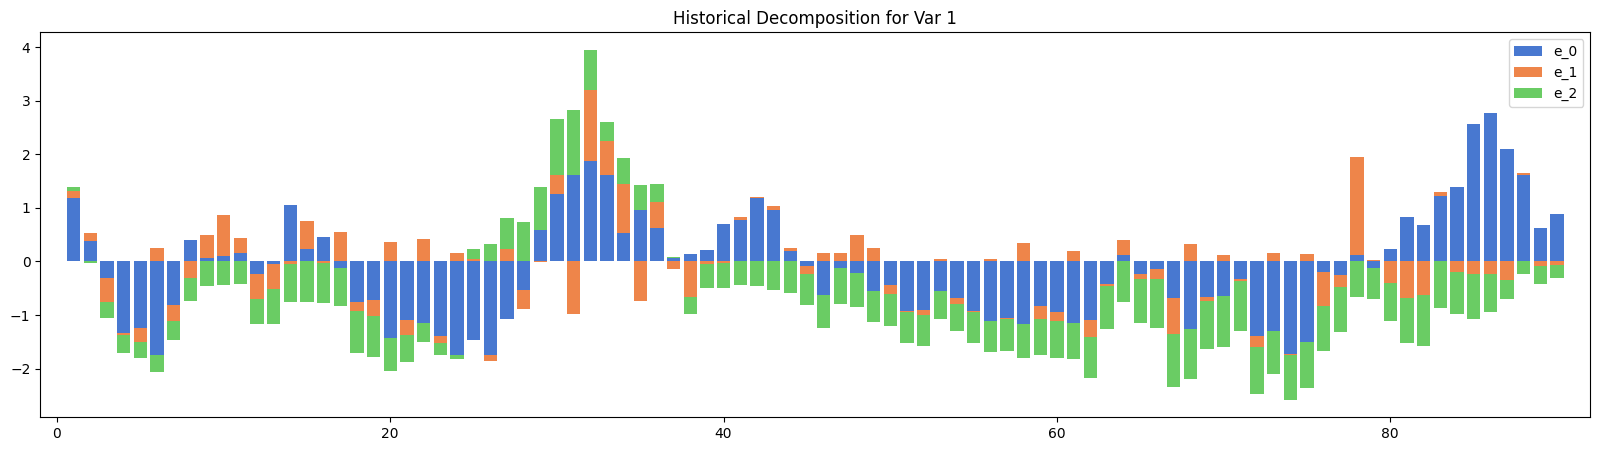

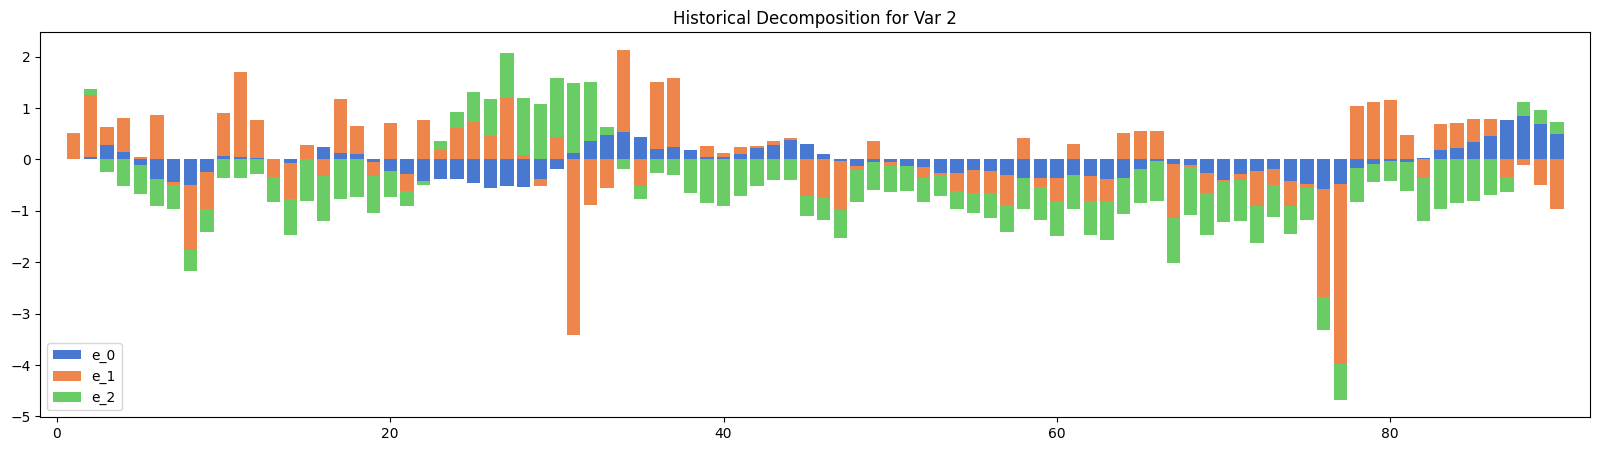

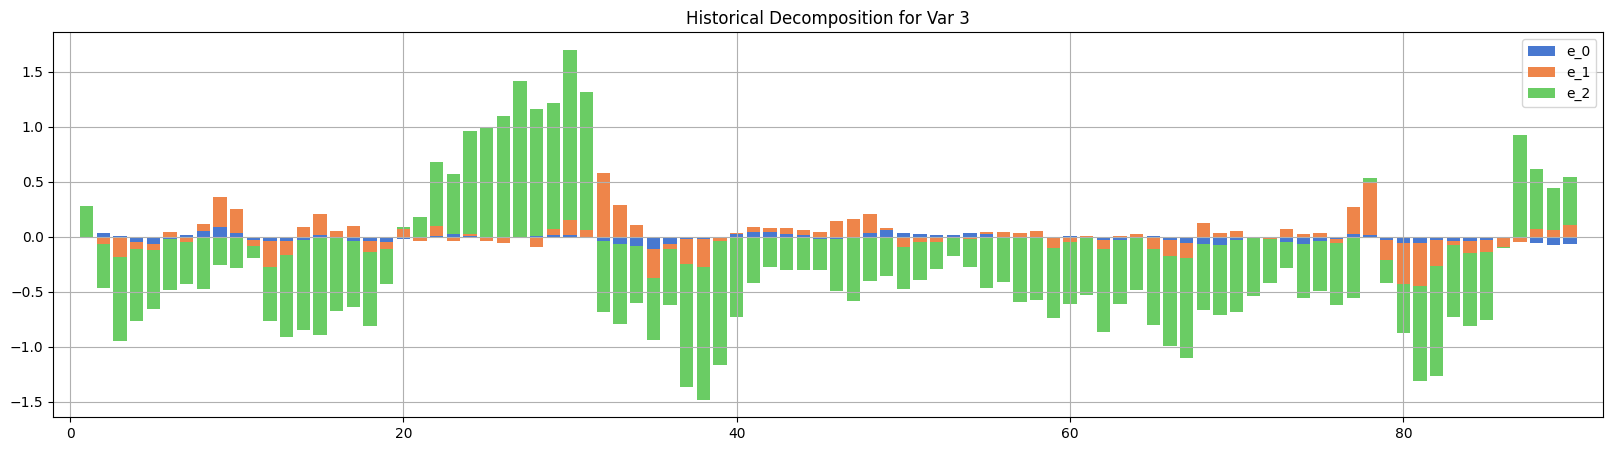

In [38]:
phat = p_bic
phi_hat,Omega_hat,F,U_hat,Yhat,Y_lag,Y_predm,phat = bp.OLS_VAR(y,phat)
HDm = bp.HistDecomp(y,phat,phi_hat,Omega_hat,F,U_hat,restrict)

## 9. 그레인저 인과관계 검정 (Granger Causality Test)

#### 구문
`bp` 패키지 속의 `GCtest`라는 함수를 사용하면 y1과 y2 벡터의 그레인저 인과관계 검정 결과를 도출할 수 있다. 이때, `GCtest`라는 함수는 다음과 구성되어 있다.

> *<p style="font-size:20px">`Wald, pval = bp.GCtest(y1,y2,p)`</p>*
> *<p style="font-size:15px">그레인저 인과관계 검정 (Granger Causality Test)</p>*
> - **입력**:
</br></br>
    `y1`: 그레인져 인과되는 변수
    </br></br>
    `y2`: 그레인저 인과하는 변수
    </br></br>
    `p`: VAR(p) 모형의 최적 시차
    </br></br>
> - **출력**:
</br></br>
    `Wald`: Wald 검정 통계량
    </br></br>
    `pval`: p-값 (틀린 기각의 확률)
    </br></br>

#### 이론
그레인저 인과관계 (Granger Causality)의 기본 아이디어는 "원인"이 항상 "결과"를 선행한다는 것이다. 다시 말해, 만약 $x_{t}$가 $z_{t}$를 인과하고 있다면, $x_{t}$는 $z_{t}$보다 항상 먼저 일어날 것이며, 더 나아가 $z_{t}$를 예측하는데 있어서 $x_{t}$의 역사를 아는 것이 도움이 된다는 것이다. 이러한 아이디어에 기반하여 그레인저 인과관계는 예측오차의 분산을 완전한 정보 하에서 도출한 경우와 특정 변수들을 제외하는 분완전한 정보 하에서 도출한 경우를 비교한다. 만약 두 경우의 예측오차의 분산이 동일하다면, 제외된 변수들이 목적이 되는 변수들을 예측하는데 있어 어떠한 정보도 주지 못한다고 해석할 수 있다.

> **<p style="font-size:15px">정의 1</p>**
> 어떠한 확률과정 $x_{t}$는 다음과 같은 경우에 $z_{t}$를 그레인져 인과한다고 한다.
> $\begin{equation}\Sigma_{z}(h|\Omega_{t})<\Sigma_{z}(h|\Omega_{t}\setminus\{x_{s},s\leq t\})\notag\end{equation}$
> 말로 풀어서 쓴다면, 완전한 정보 하에서 예측의 목적이 되는 변수인 $z_{t}$의 $h$기 이후 예측에 대한 예측오차의 분산이 $x_{t}$라는 변수의 역사가 주어지지 않은 불완전한 정보 하에서의 예측오차의 분산보다 작다는 것이다.

다음과 같은 이변수 모형에서 그레인저 인과관계를 정의할 수 있다.
> **<p style="font-size:15px">정리 1</p>**
> 어떠한 확률과정 $y_{t}$가 다음과 같은 이변수 모형의 형태를 가진다고 가정하자.
> $\begin{equation}y_{t} = \begin{pmatrix}
        z_{t} \\
        x_{t}
    \end{pmatrix} = \begin{pmatrix}
        \mu_{1} \\
        \mu_{2}
    \end{pmatrix} + \begin{pmatrix}
        \Phi_{11}(L) & 0 \\
        \Phi_{21}(L) & \Phi_{22}(L)
    \end{pmatrix}\begin{pmatrix}
        u_{1t} \\
        u_{2t}
    \end{pmatrix}\notag\end{equation}$
> 그러면, $x_{t}$는 $z_{t}$를 그레인져 인과하지 않는다. 이를 수식으로 풀어쓴다면,
> $\begin{equation}\Sigma_{z}(h|\{y_{s},s\leq t\}) = \Sigma_{z}(h|\{z_{s},s\leq t\}) \iff \Phi_{12}(L)=0 \notag\end{equation}$
> 말로 풀어서 쓴다면, 전체 $y_{t}$를 확률 과정이 모두 주어졌을 경우의 예측오차는 $z_{t}$라는 $y_{t}$의 특정 부분만 주어진 불완전한 정보 하에서의 경우와 동일하며, 이는 계수행렬의 우상방 블록 (upper-right block)이 영행렬로 주어진 것을 통해 이변수 모형 시스템에 반영된다.

> **<p style="font-size:15px">따름 정리 1</p>**
> 어떠한 확률 과정 $y_{t}$가 다음과 같은 축약형 VAR 과정을 따른다고 하자.
> $\begin{align}
    & A(L)y_{t} = \mu + u_{t} \notag \\
    & \iff \begin{pmatrix}
        z_{t} \\
        x_{t}
    \end{pmatrix} = \begin{pmatrix}
        \mu_{1} \\
        \mu_{2}
    \end{pmatrix} + \begin{pmatrix}
        A_{11,1} & A_{12,1} \\
        A_{21,1} & A_{22,1}
    \end{pmatrix}\begin{pmatrix}
        z_{t-1} \\
        x_{t-1}
    \end{pmatrix} + \cdots + \begin{pmatrix}
        A_{11,p} & A_{12,p} \\
        A_{21,p} & A_{22,p}
    \end{pmatrix}\begin{pmatrix}
        z_{t-p} \\
        x_{t-p}
    \end{pmatrix} + \begin{pmatrix}
        u_{1t} \\
        u_{2t}
    \end{pmatrix} \notag
    \end{align}$
> 그러면, $x_{t}$는 $z_{t}$를 그레인져 인과하지 않는다. 이를 수식으로 풀어쓴다면,
> $\begin{equation}
        \Sigma_{z}(h|\{y_{s},s\leq t\}) = \Sigma_{z}(h|\{z_{s},s\leq t\}) \iff A_{12,i}=0\text{ for }i=1,\cdots,p \notag
    \end{equation}$

위 따름 정리의 내용을 사용한다면, 축약형 VAR 모형의 계수행렬의 모든 우측상방 블록이 모두 영행렬인지 확인하는 것을 통해 특정 변수들이 다른 변수들을 그레인져 인과하는지 확인해볼 수 있다. 우선, $N$개의 선형 제약을 사용하여, 그레인져 인과에 대한 귀무가설과 대립가설을 다음과 같이 표현할 수 있다.
$\begin{align}
    & H_{0}\text{: }C\cdot\beta = 0\text{ ; 특정 변수들이 다른 변수들을 그레인저 인과하지 않는다.} \notag \\
    & H_{1}\text{: }C\cdot\beta\neq 0\text{ ; 특졍 변수들이 다른 변수들을 그레인져 인과한다.} \notag
\end{align}$
$\beta = vec(B^{\prime})=vec([v,A_{1},\cdots,A_{p}])$ 일때, VAR 계수 행렬은 다음과 같은 점근적 분포 (asymptotic distribution)를 따른다.
\begin{equation}
    \sqrt{T}(\hat{\beta}-\beta)\to^{d}\mathcal{N}(0,Q^{-1}\otimes\Sigma) \notag
\end{equation}
더 나아가, VAR 모형의 계수 행렬들은 귀무가설 하에서는 다음과 같은 점근적 분포를 따른다는 것을 도출할 수 있다.
\begin{equation}
    \sqrt{T}(C\hat{\beta})\to^{d}\mathcal{N}(0,C[Q^{-1}\otimes\Sigma]C^{\prime}) \notag
\end{equation}
따라서 왈드 검정 통계량 (Wald test statistic)은
\begin{equation}
    Wald = \hat{\beta}^{\prime}C^{\prime}[C[(Z^{\prime}Z)^{-1}\otimes\hat{\Sigma}]C^{\prime}]^{-1}C\hat{\beta} \notag
\end{equation}
이며, 이는 귀무가설 하에서 다음과 같은 카이제곱 분포를 따른다.
\begin{equation}
    Wald\to^{d}\chi_{N}^{2} \notag
\end{equation}


#### 예시
특정 변수 집합이 다른 변수 집합들을 그레인저 인과하는지 검정하는 예시는 다음과 같다. 우선, 그레인저 인과되는 것으로 예상되는 변수 `y1`가 인플레이션율, 그레인저 인과하는 것으로 예상되는 변수 `y2`가 실질 GDP 상정률과 CD91일 이자율이라고 하자. 나아가 추정된 VAR 모형의 최적 시차를 `p_bic=2`이라고 하자. 그러면 `GCtest`라는 코드를 사용하여 다음과 같이 그레인저 인과관계 검정을 진행할 수 있다.

In [39]:
y1 = y[:,0] # inf
y2 = y[:,1:] # [rgdp, cd91]

Wald, pval = bp.GCtest(y1,y2,p_bic)

H0: y2가 y1을 그레인져 인과 (Granger Cause)하지 않는다.
 
The p-value is 0.1739


추정된 결과를 해석하면 Wald 검정 통계량을 사용한 p-값 (참인 귀무가설을 잘못 기각시킬 확률)이 약 0.17으로 5\%의 유의수준 하에서`y2`가 `y1`을 그레인저 인과하지 않는다는 귀무가설을 기각하지 못한다. 따라서 통계적으로 5\%의 유의수준 하에서 실질 GDP 성장률과 CD91일 이자율이 인플레이션을 그레인저 인과하지 않는다고 볼 수 있다.

## 10. 블록 외생성 제약 (Block Exogeneity Restrictions) 하 VAR

#### 구문
`bp` 패키지 속의 `SVAR_block`라는 함수를 사용하면 블록 외생성 제약 하 VAR 모형의 충격반응함수 및 부트스트래핑을 통한 충격반응함수의 신뢰구간을 도출할 수 있다. 이때, `SVAR_block`라는 함수는 다음과 구성되어 있다.

> *<p style="font-size:20px">`Theta, CILv, CIHv, cumTheta, cumCILv, cumCIHv = bp.SVAR_block(Y1, Y2, H, restrict, qt=None, p=None)`</p>*
> *<p style="font-size:15px">블록 외생성 제약 (Block Exogeneity Restriction) 하 VAR(p) 모형의 충격반응함수 및 부트스트래핑 (Bootstrapping)을 통한 충격반응함수의 신뢰구간 도출</p>*
> - **입력**:
</br></br>
    `Y1`: 도메스틱 부분 시스템, 글로벌에 의존
    </br></br>
    `Y2`: 글로벌 부분 시스템, 도메스틱과 독립적
    </br></br>
    `H`: 충격반응함수 도출 시 고려하는 최대 예측시차
    </br></br>
    `restrict`: 사용하고자하는 식별 방법 (`short`=단기제약, `long`=장기제약)
    </br></br>
    `qt`: 충격반응함수의 신뢰구간 (default = 90, 90\% 신뢰구간)
    </br></br>
    `p`: VAR(p) 모형의 최적 시차 (default = None)
    </br></br>
> - **출력**:
</br></br>
    `Theta`: 추정된 VAR(p) 모형의 충격반응함수
    </br></br>
    `CILv`: 충격반응함수 신뢰구간의 하한
    </br></br>
    `CIHv`: 충격반응함수 신뢰구간의 상한
    </br></br>
    `cumTheta`: 추정된 VAR(p) 모형의 누적된 충격반응함수
    </br></br>
    `cumCILv`: 누적된 충격반응함수 신뢰구간의 하한
    </br></br>
    `cumCIHv`: 누적된 충격반응함수 신뢰구간의 상한
    </br></br>
> - **함께 사용되는 함수**:
    </br></br>
    `OLS_VAR_block`: 블록 외생성 제약 하 다변량 VAR(p) 모형에 대한 OLS 추정
    </br></br>
    `B0invSolve`: 블록 외생성 제약 하 구조 VAR 식별 (단기 또는 장기 제약)
    </br></br>
    `irf_estimate`: 충격반응함수 추정
    </br></br>
    `randper`: 무작위 변수 순서 변경
    </br></br>


---

`SVAR_block` 함수와 함께 사용되는 함수 중에서 위에서 설명된 `irf_estimate`과 `randper` 함수를 제외한 나머지 함수들은 아래와 같이 구성되어 있다.

>> *<p style="font-size:20px">`phi_hat, SIG_hat, G0_hat, F, y, u_hat1, u_hat2, phat = bp.OLS_VAR_block(Y1,Y2,p)`</p>*
>> *<p style="font-size:15px">블록 외생성 제약 하 다변량 VAR(p) 모형에 대한 OLS 추정</p>*
>> - **입력**:
</br></br>
    `Y1`: 도메스틱 부분 시스템, 글로벌에 의존
    </br></br>
    `Y2`: 글로벌 부분 시스템, 도메스틱과 독립적
    </br></br>
    `p`: VAR(p) 모형의 최적 시차 (default = None)
    </br></br>
>> - **출력**:
</br></br>
    `phi_hat`: 축약형 VAR(p) 모형 계수 행렬의 OLS 추정량
    </br></br>
    `SIG_hat`: 축약형 VAR(p) 모형 분산-공분산 행렬의 OLS 추정량
    </br></br>
    `G0_hat`: y20 계수의 OLS 추정량 (가정: 글로벌 변수들이 도메스틱 변수들을 계수 및 오차항을 통해 동시다발적으로 영향을 미친다)
    </br></br>
    `F`: 축약형 VAR(p) 모형의 동반행렬 형태의 계수 행렬 추정량
    </br></br>
    `y`: 추정에 사용된 완전한 VAR 시스템
    </br></br>
    `u_hat1`: 도메스틱 부분 시스템의 잔차항
    </br></br>
    `u_hat2`: 글로벌 부분 시스템의 잔차항
    </br></br>
    `phat`: 추정된 VAR(p) 모형의 최적 시차
    </br></br>

>> *<p style="font-size:20px">`B0inv = bp.B0invSolve_block(Y1, Y2, phi_hat, Omega_hat, restrict)`</p>*
>> *<p style="font-size:15px">단기 또는 장기 제약을 통한 블록 외생성 제약 하 구조 VAR(p) 모형의 식별</p>*
>> - **입력**:
</br></br>
    `Y1`: 도메스틱 부분 시스템, 글로벌에 의존
    </br></br>
    `Y2`: 글로벌 부분 시스템, 도메스틱에 독립적
    </br></br>
    `phi_hat`: 축약형 VAR(p) 모형 계수 행렬의 OLS 추정량
    </br></br>
    `SIG_hat`: 축약형 VAR(p) 모형 분산-공분산 행렬의 OLS 추정량
    </br></br>
    `restrict`: 장기 또는 단기 제약에 대한 옵션 (`short` 또는 `long`으로 입력)
    </br></br>
>> - **출력**:
</br></br>
    `B0inv`: 구조형 VAR 모형의 식별에 사용되는 B0의 역행렬
    </br></br>


---


#### 이론
블록 외생성 제약 하의 VAR(p) 모형 추정은 Lastrapes (2005)을 참고한다. 이때, 논문에서 추가적으로 가정한 도메스틱 부분 시스템의 대각 제약 (diagonal restriction)은 완화한다.

##### (1) 추정
우선 $y_{2t}$가 $y_{1t}$에 대해 블록 외생적이라는 블록 외생성 제약을 가정하자. 즉, 글로벌 변수들인 $y_{2t}$는 $y_{1t}$에 독립적으로 결정된다. 이러한 블록 외생성 제약을 명시적으로 보이기 위해, 축약형 VAR(p) 모형을 다음과 같이 분할하여 표현할 수 있다.
$\begin{equation}
    y_{t} = \begin{pmatrix}
        y_{1t} \\
        y_{2t}
    \end{pmatrix} = \sum_{i=1}^{p}{\begin{pmatrix}
        A_{11}^{i} & A_{12}^{i} \\
        0 & A_{22}^{i}
    \end{pmatrix}\begin{pmatrix}
        y_{1t-i} \\
        y_{2t-i}
    \end{pmatrix}} + \begin{pmatrix}
        u_{1t} \\
        u_{2t}
    \end{pmatrix} \tag{1}
\end{equation}$
또한, 축약형 VAR(p) 모형의 분산-공분산 행렬 역시 다음과 같이 분할하여 표현할 수 있다.
$\begin{equation}
    \Sigma = \mathbb{E}\begin{pmatrix}
        u_{1t} \\
        u_{2t}
    \end{pmatrix}\begin{pmatrix}
        u_{1t}^{\prime} & u_{2t}^{\prime} 
    \end{pmatrix} = \begin{pmatrix}
        \Sigma_{11} & \Sigma_{12} \\
        \Sigma_{21} & \Sigma_{22}
    \end{pmatrix} \tag{2}
\end{equation}$
이때, 블록 외생성 제약 하에서 VAR 시스템의 각 식에 해당하는 설명변수들이 달라져서 OLS 추정량이 효율적이지 않아지는 문제가 발생한다. 하지만, 위 (1) 식은 다음과 같이 모수변환 (reparametrized)하여 독립적인 식으로 표현할 수 있다.
$\begin{align}
    & y_{1t} = \sum_{i=1}^{p}{A_{11}^{i}y_{1t-i}} + \sum_{i=0}^{p}{G_{i}y_{2t-i}} + v_{t} \tag{3} \\
    & y_{2t} = \sum_{i=1}^{p}{A_{22}^{i}y_{2t-i}} + u_{2t} \tag{4}
\end{align}$
where
$\begin{align}
    & G_{0} = \Sigma_{12}\Sigma_{22}^{-1} \tag{5} \\
    & G_{i} = A_{12}^{i} - G_{0}\cdot A_{22}^{i} \tag{6} \\
    & \mathbb{E}(v_{t}v_{t}^{\prime}) \equiv H = \Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{12}^{\prime} \tag{7}
\end{align}$
이때, 식 (3)에서 $i=0$부터 시작하는 합산 과정은 글로벌 변수들이 도메스틱 변수들에 대해 오차항 사이의 상관관계와 더 직접적으로 $G_{0}$라는 계수를 통해 동시다발적인 효과를 준다는 것이 암묵적으로 가정되어 있다.

한편, 식 (3)과 (4)로 표현된 축약형 VAR 모형의 부분 시스템들이 독립적으로 추정되었다면, 식 (5)에서 (7)의 관계를 사용하여 식 (1)과 식 (2)로 표현된 최초의 계수 행렬 및 분산-공분산 행렬을 복구할 수 있다.
1. 계수  
    - $\hat{A}_{11}^{i}$와 $\hat{A}_{22}^{i}$

    위 계수들은 식 (3)과 (4)를 통해 바로 추정될 수 있다.

    - $\hat{A}_{12}^{i}$  
    
    식 (3)에서 $i=0,\cdots,p$에 대한 $\hat{G}_{i}$가 추정된다면 식 (6)을 사용하여 다음과 같이 $\hat{A}_{12}^{i}$을 복구시킬 수 있다.
    $\begin{equation}
        \hat{A}_{12}^{i} = \hat{G}_{i} + \hat{G}_{0}\cdot\hat{A}_{22}^{i} \notag
    \end{equation}$

    - $\hat{A}_{21}^{i}$  

    블록 외생성 제약을 통해
    $\begin{equation}
        \hat{A}_{21}^{i} = 0_{(k_{2}\times k_{1})} \notag
    \end{equation}$
    이 된다.

2. 분산-공분산 행렬  
    - $\hat{\Sigma}_{22}$

    $\Sigma_{22}$는 식 (4)를 통해 다음과 같이 직접적으로 추정될 수 있다. 우선 다음과 같은 잔차항을 도출한다.
    $\begin{equation}
            \hat{u}_{2t} = y_{2t} - \sum_{i=1}^{p}{\hat{A}_{22}^{i}y_{2t-1}} \notag
    \end{equation}$
    이를 사용하여 다음과 같이 $\hat{\Sigma}_{22}$을 추정한다.
    $\begin{equation}
            \hat{\Sigma}_{22} = \frac{\hat{u}_{2t}\hat{u}_{2t}^{\prime}}{T-p\cdot k_{2}} \notag
    \end{equation}$

    - $\hat{\Sigma}_{12}$

    $\hat{\Sigma}_{22}$가 도출되었기 때문에 이를 식 (5)에 활용하여 다음과 같이 $\hat{\Sigma}_{12}$를 도출할 수 있다.
    $\begin{equation}
            \hat{\Sigma}_{12} = \hat{G}_{0}\cdot\hat{\Sigma}_{22} \notag
    \end{equation}$

    - $\hat{\Sigma}_{11}$

    식 (3)을 추정하여 분산-공분산 행렬의 추정량 $\hat{H}$를 얻을 수 있다. 또한, $\hat{\Sigma}_{12}$와 $\hat{\Sigma}_{22}$가 도출되었기 때문에 이들을 식 (7)에 대입하여 다음과 같이 $\hat{Sigma}_{11}$을 구할 수 있다.
    $\begin{equation}
            \hat{\Sigma}_{11} = \hat{H} + \hat{\Sigma}_{12}\hat{\Sigma}_{22}^{-1}\hat{\Sigma}_{12}^{\prime} \notag
    \end{equation}$

##### (2) 식별
축약형 VAR 모형의 파라미터를 추정한 이후 단기 제약 또는 장기 제약을 통해 구조형 VAR 모형을 식별할 수 있다. 각 방법을 구체적으로 설명하기 전에 구조형 VAR 모형은
\begin{align*}
    & B(L)y_{t} = \varepsilon_{t} \\
    & \Rightarrow y_{t} = B(L)^{-1}\varepsilon_{t} \equiv \Theta(L)\varepsilon_{t}
\end{align*}
축약형 VAR 모형은
\begin{align*}
    & A(L)y_{t} = u_{t} \\
    & \Rightarrow y_{t} = A(L)^{-1}u_{t} \equiv \Psi(L)u_{t}
\end{align*}
의 무한기 MA 과정으로 표현할 수 있다. 이를 통해
\begin{align}
    & \Theta_{0} = B_{0}^{-1} \tag{8} \\
    & \Theta_{i} = \Psi_{i}\Theta_{0} \tag{9}
\end{align}

##### (i) 단기 제약을 통한 식별
구조형 VAR 모형을 축약형 VAR 모형으로 변환하는 과정을 통해
\begin{align*}
        & A_{i} = B_{0}^{-1}B_{i} \iff B_{0}A_{i} = B_{i} \\
        & u_{t} = B_{0}^{-1}\varepsilon_{t} \iff B_{0}u_{t} = \varepsilon_{t}
\end{align*}
와 같은 관계를 도출할 수 있다. 이를 통해 $u_{t}$의 분산-공분산 행렬은 다음과 같이 도출할 수 있다.
\begin{equation*}
    \mathbb{E}(u_{t}u_{t}^{\prime}) = \mathbb{E}(B_{0}^{-1}\varepsilon_{t}\varepsilon_{t}^{\prime}{B_{0}^{-1}}^{\prime}) = B_{0}^{-1}I_{k}{B_{0}^{-1}}^{\prime} = \Sigma
\end{equation*}
이러한 형태는 식 (8)의 관계를 통해 다음과 같이 partiion된 형탤로 표현될 수 있다.
\begin{align*}
    & \Sigma = \Theta_{0}\Theta_{0}^{\prime} \notag \\
    & \Rightarrow \begin{pmatrix}
        \Sigma_{11} & \Sigma_{12} \\
        \Sigma_{21} & \Sigma_{22}
    \end{pmatrix} = \begin{pmatrix}
        \Theta_{11}^{0}{\Theta_{11}^{0}}^{\prime} + \Theta_{12}^{0}{\Theta_{12}^{0}}^{\prime} & \Theta_{12}^{0}{\Theta_{22}^{0}}^{\prime} \\
        \Theta_{22}^{0}{\Theta_{12}^{0}}^{\prime} & \Theta_{22}^{0}{\Theta_{22}^{0}}^{\prime}
    \end{pmatrix}
\end{align*}
따라서 구조형 모형의 식별을 담당하는 $\Theta_{0}=B_{0}^{-1}$는 다음과 같은 순서로 도출할 수 있다.
1. $\Theta_{22}^{0}=(B_{22}^{0})^{-1}$

    우선, $\Sigma_{22}$에 춀레스키 분해를 사용함으로서 $B_{0}^{-1}$ 행렬의 (2,2) partition을 도출할 수 있다. 즉,
\begin{equation*}
    \Theta_{22}^{0}=(B_{22}^{0})^{-1} = chol(\Sigma_{22})
\end{equation*}

2. $\Theta_{12}^{0}=(B_{12}^{0})^{-1}$

    위에서 도출된 $\Theta_{22}^{0}$를 사용하여 다음과 같은 관계를 통해 $\Theta_{12}^{0}$을 도출할 수 있다.
\begin{align*}
    & \Sigma_{12} = \Theta_{12}^{0}{\Theta_{22}^{0}}^{\prime} \\
    & \Rightarrow \Theta_{12}^{0} = \Sigma_{12}({\Theta_{22}^{0}}^{\prime})^{-1}
\end{align*}

3. $\Theta_{11}^{0}=(B_{11}^{0})^{-1}$

    마지막으로 위에서 도출된 $\Theta_{12}^{0}$와 $\Theta_{22}^{0}$을 사용하여 다음과 같은 관계를 도출할 수 있다.
\begin{align*}
    & \Sigma_{11} = \Theta_{11}^{0}{\Theta_{11}^{0}}^{\prime} + \Theta_{12}^{0}{\Theta_{12}^{0}}^{\prime} \\
    & \Rightarrow \Theta_{11}^{0}{\Theta_{11}^{0}}^{\prime} = \Sigma_{11} - \Theta_{12}^{0}{\Theta_{12}^{0}}^{\prime}
\end{align*}
    이후 해당 관계에 다음과 같은 춀레스키 분해를 통해 $\Theta_{11}^{0}$를 도출할 수 있다.
\begin{equation*}
    \Theta_{11}^{0} = chol(\Sigma_{11} - \Theta_{12}^{0}{\Theta_{12}^{0}}^{\prime})
\end{equation*}

결과적으로 춀레스키 분해가 적용된 $\Theta_{11}^{0}$와 $\Theta_{22}^{0}$가 하방 삼각행렬 형태인 관계로 부분-시스템 $y_{1t}$와 $y_{2t}$ 각각의 변수 순서가 중요함을 알 수 있다.

##### (ii) 장기 제약을 통한 식별
한편, VAR 모형의 경우 같이 블록 외생성 제약 하에서의 VAR 모형에서도 장기 제약을 통한 식별을 할 수 있다. 구조형 및 축약형 VAR 모형의 시차 다항식 (lag polynomial)을 사용하면, 다음과 같은 관계를 도출할 수 있다.
\begin{align}
    & B_{0}^{-1}B(L) = A(L) \notag \\
    & \Rightarrow B_{0}^{-1} = A(L)B(L)^{-1} \notag \\
    & \Rightarrow B_{0}^{-1} = A(1)\Theta(1) \tag{10}
\end{align}
나아가 구조형 VAR과 축약형 VAR 모형의 장기분산은 다음과 같은 관계로 이어진다.
\begin{equation}
    \Theta(1)\Theta(1)^{\prime} = \Psi(1)\Sigma\Psi(1)^{\prime} \notag
\end{equation}
해당 관계는 행렬의 partition으로 다음과 같이 표현할 수 있다.
$\begin{align}
    & \begin{pmatrix}
        \Theta(1)_{11}\Theta(1)_{11}^{\prime}+\Theta(1)_{12}\Theta(1)_{12}^{\prime} & \Theta(1)_{12}\Theta(1)_{22}^{\prime} \\
        \Theta(1)_{22}\Theta(1)_{12}^{\prime} & \Theta(1)_{22}\Theta(1)_{22}^{\prime}
    \end{pmatrix} = \notag \\
    &\hspace{10ex} \begin{pmatrix}
        \Psi(1)_{11} & \Psi(1)_{12} \\
        0 & \Psi(1)_{22}
    \end{pmatrix}\begin{pmatrix}
        \Sigma_{11} & \Sigma_{12} \\
        \Sigma_{21} & \Sigma_{22}
    \end{pmatrix}\begin{pmatrix}
        \Psi(1)_{11}^{\prime} & 0 \\
        \Psi(1)_{12}^{\prime} & \Psi(1)_{22}^{\prime}
    \end{pmatrix} \tag{11}
\end{align}$
이때, $\Sigma$는 축약형 VAR의 추정으로 추정되었으며, $\Psi(1)$ 역시 추정된 축약형 VAR의 계수 행렬 추정치를 통해 다음과 같이 도출될 수 있다.
\begin{equation}
    \hat{\Psi}(1) = \hat{A}(1)^{-1} = (I-\hat{A}_{1}-\cdots-\hat{A}_{p})^{-1} \notag
\end{equation}
따라서 식 (10)과 (11)을 사용하면 다음과 같은 단계를 통해 $B_{0}^{-1}$을 식별할 수 있다.

- $\Theta(1)_{22}$

    먼저, 식 (11)에서 다음 관계를 알 수 있다.
    $\begin{equation}
        \Theta(1)_{22}\Theta(1)_{22}^{\prime} = \hat{\Psi}(1)_{22}\hat{\Sigma}_{22}\hat{\Psi}(1)_{22}^{\prime} \notag
    \end{equation}$
    이후, 춀레스키 분해를 사용하면 $\Theta(1)_{22}$를 도출할 수 있다.
    $\begin{equation}
        \Theta(1)_{22} = chol(\hat{\Psi}(1)_{22}\hat{\Sigma}_{22}\hat{\Psi}(1)_{22}^{\prime}) \notag
    \end{equation}$

- $\Theta(1)_{12}$

    식 (11)에서 다음과 같은 관계를 알 수 있다.
    $\begin{equation}
        \Theta(1)_{12}\Theta(1)_{22}^{\prime} = \hat{\Psi}(1)\hat{\Sigma}_{12}\hat{\Psi}(1)_{22}^{\prime} + \hat{\Psi}(1)_{12}\hat{\Sigma}_{22}\hat{\Psi}(1)_{22}^{\prime} \notag
    \end{equation}$
    이때, 이전 단계에서 $\Theta(1)_{22}$를 도출하였기 때문에 다음과 같이 $\Theta(1)_{12}$를 도출할 수 있다.
    $\begin{equation}
        \Theta(1)_{12} = [\hat{\Psi}(1)\hat{\Sigma}_{12}\hat{\Psi}(1)_{22}^{\prime} + \hat{\Psi}(1)_{12}\hat{\Sigma}_{22}\hat{\Psi}(1)_{22}^{\prime}]\cdot(\Theta(1)_{22}^{\prime})^{-1} \notag
    \end{equation}$

- $\Theta(1)_{11}$

    마지막으로 식 (11)에서 다음과 같은 관계를 알 수 있다.
    $\begin{align}
        & \Theta(1)_{11}\Theta(1)_{11}^{\prime} + \Theta(1)_{12}\Theta(1)_{12}^{\prime} \notag \\
        & \hspace{5ex} = \hat{\Psi}(1)_{11}\hat{\Sigma}_{11}\hat{\Psi}(1)_{11}^{\prime} + \hat{\Psi}(1)_{12}\hat{\Sigma}_{21}\hat{\Psi}(1)_{11}^{\prime} + \hat{\Psi}(1)_{11}\hat{\Sigma}_{12}\hat{\Psi}(1)_{12}^{\prime} + \hat{\Psi}(1)_{12}\hat{\Sigma}_{22}\hat{\Psi}(1)_{12}^{\prime} \notag \\
        & \hspace{5ex} \equiv L_{11} \notag
    \end{align}$
    이후, 춀레스키 분해를 사용하면 $\Theta(1)_{11}$을 도출할 수 있다.
    $\begin{equation}
        \Theta(1)_{11} = chol\Bigg(L_{11}-\Theta(1)_{12}\Theta(1)_{12}^{\prime}\Bigg) \notag
    \end{equation}$

- $B_{0}^{-1}$ 식별

    우리는 지금까지 다음과 같이 구성된 $\Theta(1)$을 도출하였다.
    $\begin{equation}
        \hat{\Theta}(1) = \begin{pmatrix}
            \Theta(1)_{11} & \Theta(1)_{12} \\
            0 & \Theta(1)_{22}
        \end{pmatrix} \notag
    \end{equation}$
    따라서 식 (10)의 관계를 사용하면 다음과 같이 $B_{0}^{-1}$을 식별할 수 있다.
    $\begin{equation}
        B_{0}^{-1} = \hat{A}(1)\hat{\Theta}(1) \notag
    \end{equation}$

#### 예시
블록 외생성 가정 하 VAR 모형의 충격반응함수 도출을 위해 다음과 같이 데이터를 불러오자. 우선 블록 외생성 가정이 사용되는 이론적 배경은 소규모 개방경제인 한국의 구조충격들은 미국에 영향을 줄 수 없지만, 미국의 구조충격들의 경우 한국에 영향을 미칠 수 있다는 것이다. 이를 통해 $y_{1t}$은 한국의 거시경제변수, $y_{2t}$는 미국의 거시경제변수 데이터를 사용한다.

구체적으로 한국의 거시경제변수의 경우 무담보콜금리, 원달러 환율, 전산업생산지수, 인플레이션율이. 한편, 미국 거시경제변수의 경우 유효 연방 기금 금리, 유가를 제외한 원자재 지수, M2, 미국 전산업생산지수, 인플레이션율이다. 이들은 모두 2003년 1월부터 2023년 12월까지의 월별 데이터이다. 결과적으로 VAR 시스템의 변수는 다음과 같다.
\begin{equation*}
    y_{t} = \begin{pmatrix}
        korint_{t} & korexch_{t} & korrip_{t} & korinf_{t} & usffe_{t} & nfcom_{t} & usm2_{t} & usip_{t} & usinf_{t}
    \end{pmatrix}^{\prime}
\end{equation*}

해당 데이터들을 불러오고 반응변수 $y_{t}$를 구성하는 코드는 다음과 같다.

In [41]:
# (1) Korea Data (Domestic)
dataset1 = pd.read_excel('./test_data/python_data.xlsx', sheet_name='KORmonth') # 2004 01 - 2023 12
 
# actual data from 2004 01 - 2023 12
# int, exch, rip, cpi
kordata = pd.DataFrame(dataset1)
kordata.columns = ['Date', 'call', 'exch', 'rip', 'cpi']
kordata = kordata.drop(columns='Date')
Data1 = bp.matrix(kordata).copy()
Y1 = Data1.copy()

# (2) World Data (Global)
dataset2 = pd.read_excel('./test_data/python_data.xlsx', sheet_name='Worldmonth') # 2004 01 - 2023 12
# actual data from 2004 01 - 2023 12
# ffe, nfcom, m2, ip, cpi
wordata = pd.DataFrame(dataset2)
wordata.columns = ['Date', 'ffe', 'nfcom', 'm2', 'ip', 'cpi']
wordata = wordata.drop(columns='Date')
Data2 = bp.matrix(wordata).copy()
Y2 = Data2.copy()

y = np.hstack((Y1,Y2))

블록 외생성 가정 하에서 예측시차를 36기 (3년), 구조모형 식별을 위해 단기 제약을 사용하여 도출한 충격반응함수의 경우 다음과 같다. 이때, 최적 시차는 따로 입력하지 않고 4절에서 언급한 것과 같이 자동화된 방법을 사용한다.

   
 VAR Order Selected by Sequential testing =  15
 VAR Order Selected by AIC =                 15
 VAR Order Selected by BIC =                 2
 VAR Order Selected by HQ =                  2
 
BIC로 추정한 VAR 최적 시차 =  2


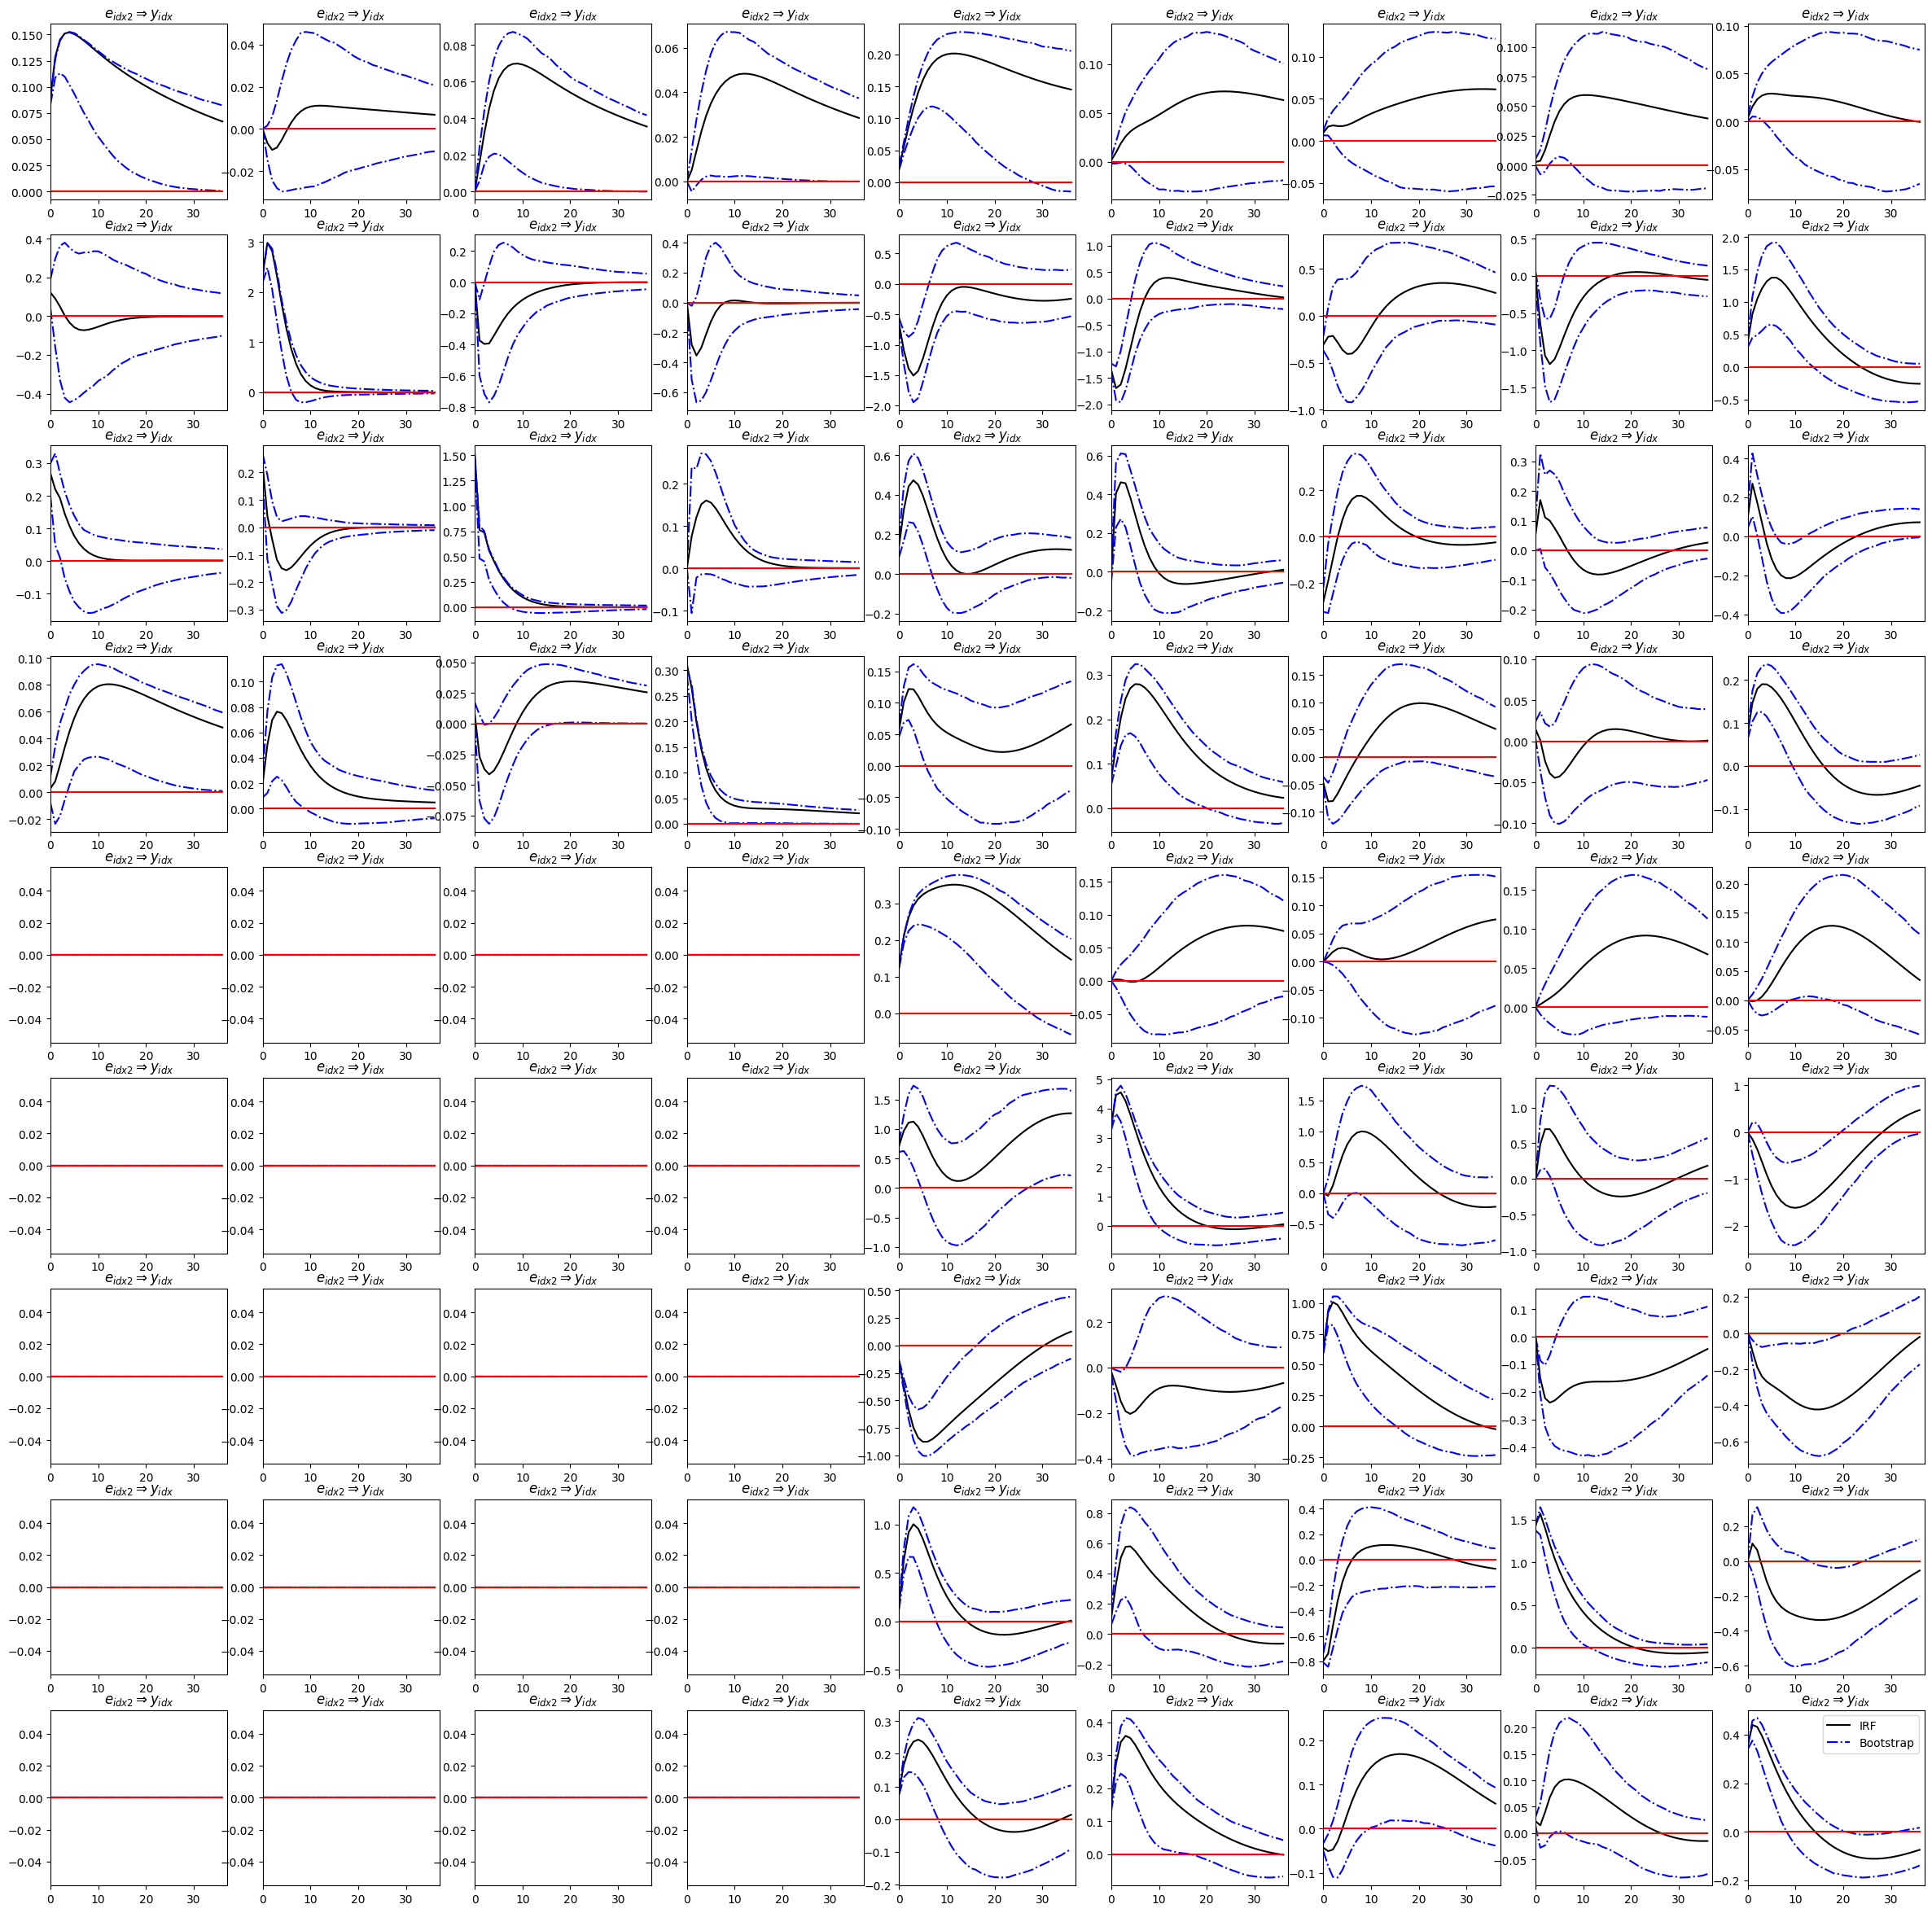

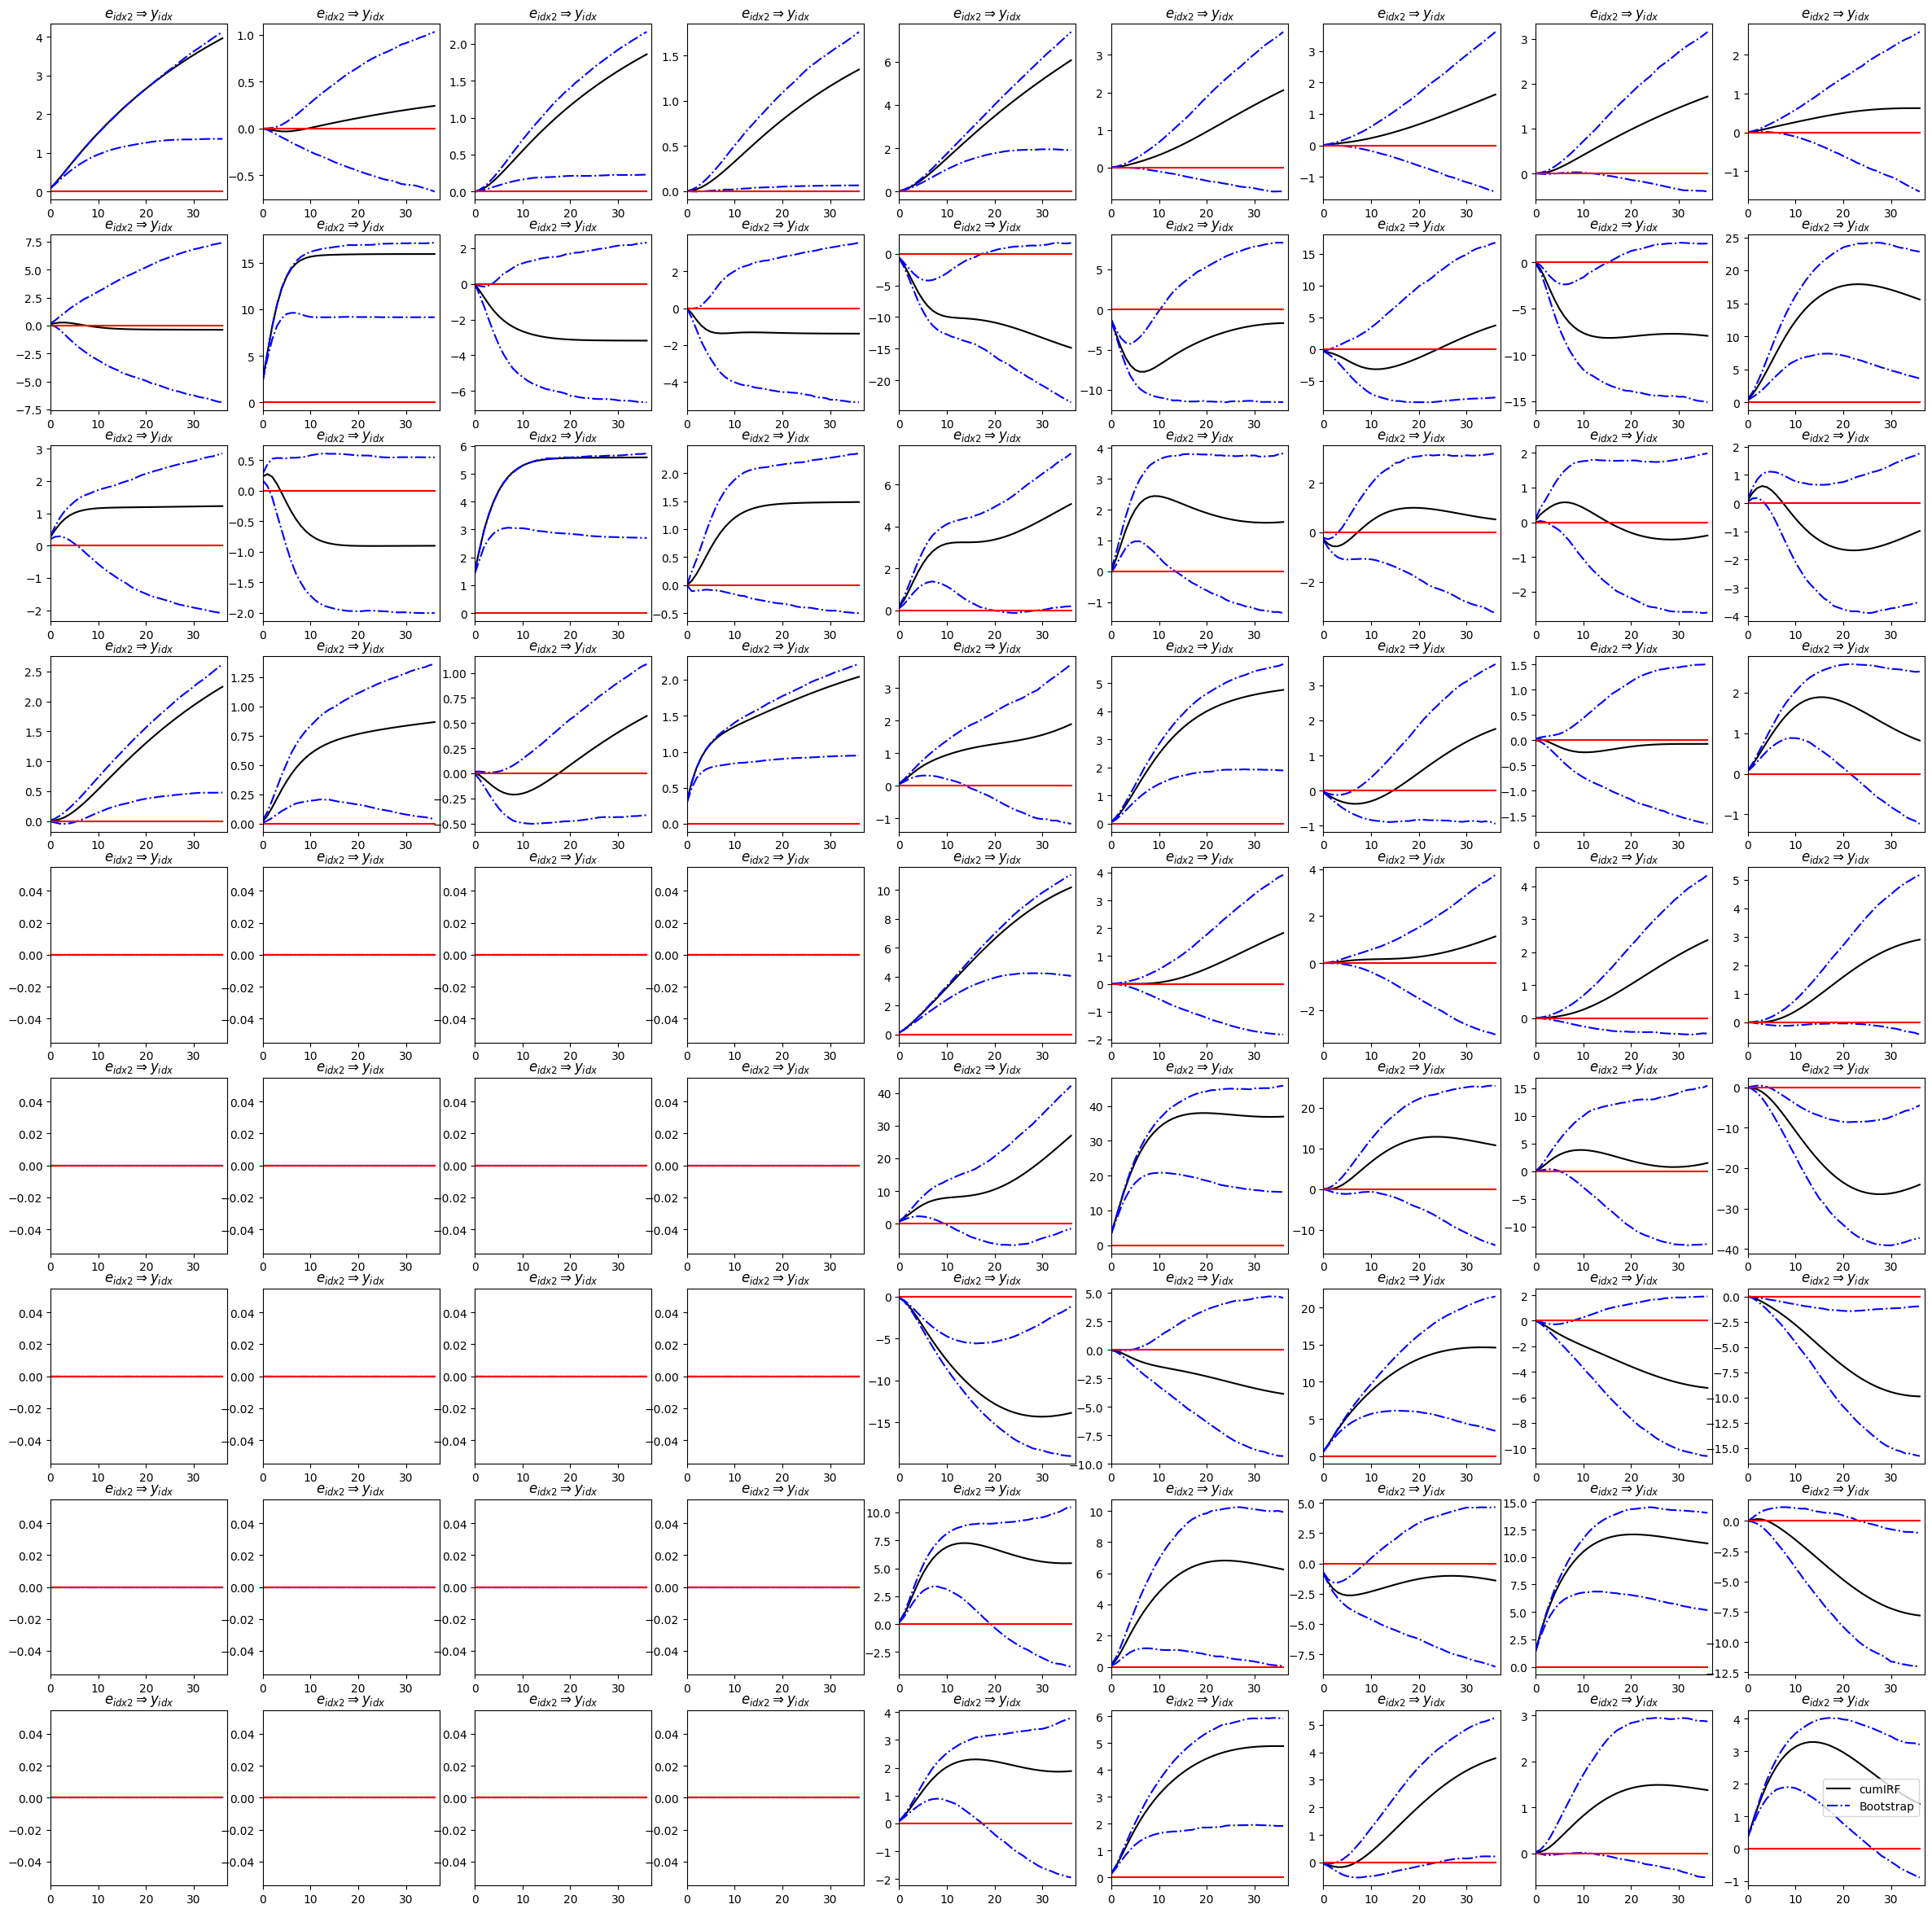

In [42]:
H = 36 # 36 months = 3 years
restrict = 'short'

Theta_block, CILv_block, CIHv_block, cumTheta_block, cumCILv_block, cumCIHv_block = bp.SVAR_block(Y1,Y2,H,restrict)